In [101]:
!pip install -q gdown

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Downloading the data

In [103]:
import os
import gdown

url = "https://docs.google.com/spreadsheets/d/1JL_R0XP5EjBBfpf7yyfYUdosRtY1Ru80/edit?usp=sharing"
file_path = "Group31_Data.xlsx"

if os.path.exists(file_path):
    print(f"✅ File already exists: {file_path}. Skipping download.")
else:
    gdown.download(url, file_path, fuzzy=True)
    print(f"⬇️ Downloaded successfully: {file_path}")


✅ File already exists: Group31_Data.xlsx. Skipping download.


# Reading and loading the data

In [ ]:
sheets = pd.read_excel(file_path, sheet_name=None)

for name, df in sheets.items():
    print(f"\n================= {name} =================")
    print("\nSample rows:")
    print(df.head())

    print("\nExample tuples:")
    print(df.head().to_records(index=False))

    print(f"\nShape: {df.shape}")
    print("==========================================")


================= HDFC NAV Data =================

Sample rows:
   Net Asset Value       Date
0           10.089 2021-01-01
1           10.190 2021-01-04
2           10.222 2021-01-05
3           10.254 2021-01-06
4           10.289 2021-01-07

Example tuples:
[(10.089, '2021-01-01T00:00:00.000000000')
 (10.19 , '2021-01-04T00:00:00.000000000')
 (10.222, '2021-01-05T00:00:00.000000000')
 (10.254, '2021-01-06T00:00:00.000000000')
 (10.289, '2021-01-07T00:00:00.000000000')]

Shape: (1200, 2)

================= ICICI Prudential NAV Data =================

Sample rows:
   Net Asset Value       Date
0             9.98 2014-05-19
1            10.09 2014-05-20
2            10.15 2014-05-21
3            10.30 2014-05-22
4            10.45 2014-05-23

Example tuples:
[( 9.98, '2014-05-19T00:00:00.000000000')
 (10.09, '2014-05-20T00:00:00.000000000')
 (10.15, '2014-05-21T00:00:00.000000000')
 (10.3 , '2014-05-22T00:00:00.000000000')
 (10.45, '2014-05-23T00:00:00.000000000')]

Shape: (2829, 2)



### Load and clean NAV data for a single bank from the given Excel sheet. Expected columns in the sheet: 'Net Asset Value', 'Date' Returns a cleaned DataFrame with columns: ['date', 'nav', 'daily_return']
    

In [ ]:
def load_and_clean_bank_nav(sheet_name, excel_path=file_path):
    
    df = pd.read_excel(excel_path, sheet_name=sheet_name)

    df = df.rename(columns={
        "Date": "date",
        "Net Asset Value": "nav"
    })

    df = df[["date", "nav"]]

    df["date"] = pd.to_datetime(df["date"], errors="coerce")

    df["nav"] = pd.to_numeric(df["nav"], errors="coerce")

    df = df.dropna(subset=["date", "nav"])

    df = df.sort_values("date")

    df = df.drop_duplicates(subset="date", keep="first")

    df = df.reset_index(drop=True)

    df["daily_return"] = df["nav"].pct_change()

    return df

In [5]:
hdfc_df = load_and_clean_bank_nav("HDFC NAV Data")
icici_df = load_and_clean_bank_nav("ICICI Prudential NAV Data")
sbi_df   = load_and_clean_bank_nav("SBI NAV Data")

print(hdfc_df.head())
print(icici_df.head())
print(sbi_df.head())


        date     nav  daily_return
0 2021-01-01  10.089           NaN
1 2021-01-04  10.190      0.010011
2 2021-01-05  10.222      0.003140
3 2021-01-06  10.254      0.003131
4 2021-01-07  10.289      0.003413
        date    nav  daily_return
0 2014-05-19   9.98           NaN
1 2014-05-20  10.09      0.011022
2 2014-05-21  10.15      0.005946
3 2014-05-22  10.30      0.014778
4 2014-05-23  10.45      0.014563
        date      nav  daily_return
0 2023-03-17  10.0399           NaN
1 2023-03-20  10.0251     -0.001474
2 2023-03-21  10.0098     -0.001526
3 2023-03-22  10.0259      0.001608
4 2023-03-23   9.9957     -0.003012


# Converting the daily data to monthly data

Take a daily NAV dataframe with columns ['date', 'nav', 'daily_return']
and convert it to monthly frequency.

Output:
    - One row per month (month end)
    - Columns: ['month_end', 'nav_month_end', 'monthly_return']


In [104]:
def to_monthly_nav_and_returns(daily_df):
    
    df = daily_df.copy()

    df = df.set_index("date")

    monthly_nav = df["nav"].resample("M").last()

    monthly = monthly_nav.to_frame(name="nav_month_end")

    monthly["monthly_return"] = monthly["nav_month_end"].pct_change()

    monthly = monthly.reset_index()  
    monthly = monthly.rename(columns={"date": "month_end"})

    return monthly



- Load and clean daily NAV from the given sheet
- Convert to monthly NAV + monthly_return
    

In [ ]:
def load_bank_monthly(sheet_name, excel_path=file_path):
    daily_df = load_and_clean_bank_nav(sheet_name, excel_path=excel_path)
    monthly_df = to_monthly_nav_and_returns(daily_df)
    return monthly_df


In [8]:
# Load monthly data for each bank
hdfc_monthly = load_bank_monthly("HDFC NAV Data", excel_path=file_path)
icici_monthly = load_bank_monthly("ICICI Prudential NAV Data", excel_path=file_path)
sbi_monthly   = load_bank_monthly("SBI NAV Data", excel_path=file_path)

C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\3537764965.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_nav = df["nav"].resample("M").last()
C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\3537764965.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_nav = df["nav"].resample("M").last()
C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\3537764965.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_nav = df["nav"].resample("M").last()


In [ ]:
hdfc_monthly.head()

,month_end,nav_month_end,monthly_return
0,2021-01-31,9.969,NaN
1,2021-02-28,10.752,0.078543
2,2021-03-31,10.930,0.016555
3,2021-04-30,10.875,-0.005032
4,2021-05-31,11.727,0.078345


In [10]:
icici_monthly.head()

,month_end,nav_month_end,monthly_return
0,2014-05-31,10.21,NaN
1,2014-06-30,11.13,0.090108
2,2014-07-31,11.09,-0.003594
3,2014-08-31,11.54,0.040577
4,2014-09-30,11.81,0.023397


## A Diagram comparing data of all 3 banks 

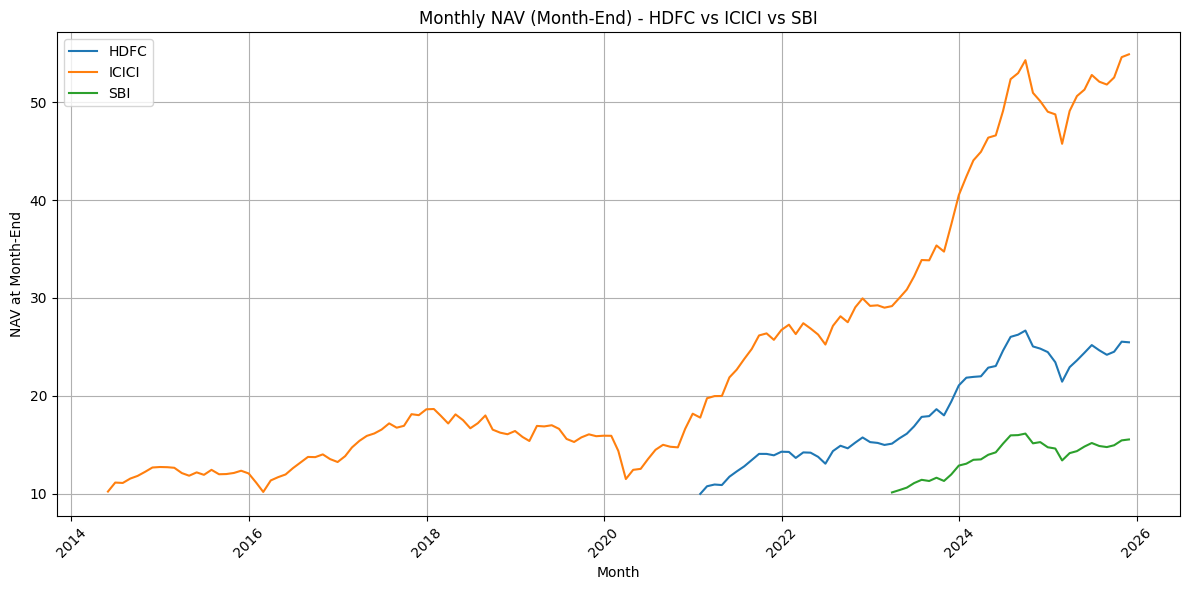

In [11]:
plt.figure(figsize=(12, 6))

plt.plot(hdfc_monthly["month_end"], hdfc_monthly["nav_month_end"], label="HDFC")
plt.plot(icici_monthly["month_end"], icici_monthly["nav_month_end"], label="ICICI")
plt.plot(sbi_monthly["month_end"],   sbi_monthly["nav_month_end"],   label="SBI")

plt.title("Monthly NAV (Month-End) - HDFC vs ICICI vs SBI")
plt.xlabel("Month")
plt.ylabel("NAV at Month-End")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

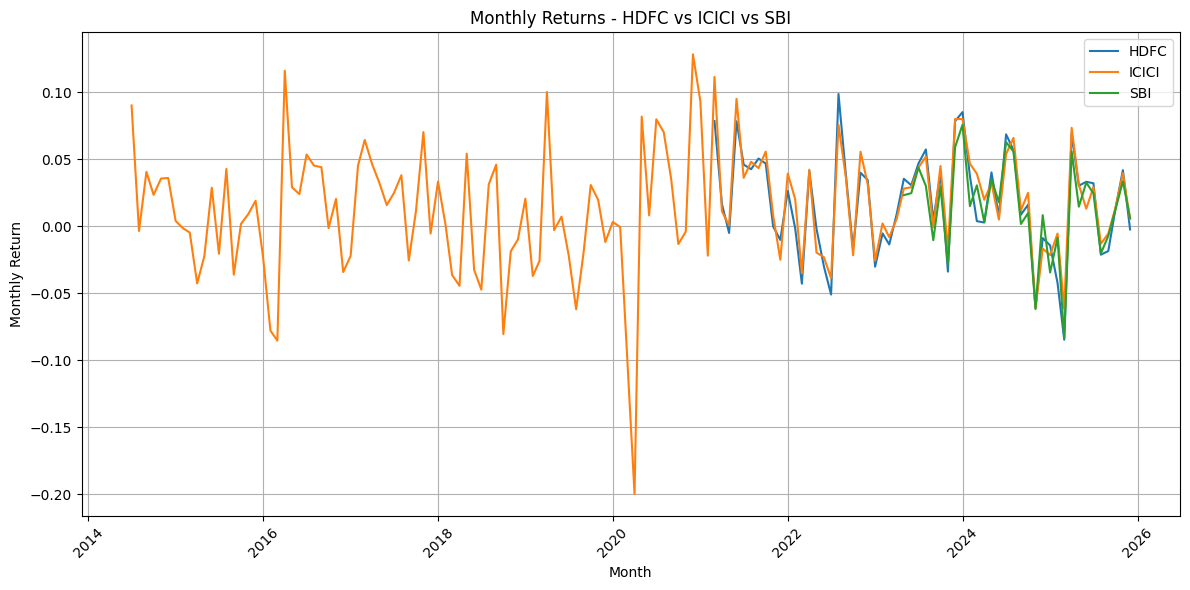

In [12]:
hdfc_ret = hdfc_monthly.dropna(subset=["monthly_return"])
icici_ret = icici_monthly.dropna(subset=["monthly_return"])
sbi_ret   = sbi_monthly.dropna(subset=["monthly_return"])

plt.figure(figsize=(12, 6))

plt.plot(hdfc_ret["month_end"], hdfc_ret["monthly_return"], label="HDFC")
plt.plot(icici_ret["month_end"], icici_ret["monthly_return"], label="ICICI")
plt.plot(sbi_ret["month_end"],   sbi_ret["monthly_return"],   label="SBI")

plt.title("Monthly Returns - HDFC vs ICICI vs SBI")
plt.xlabel("Month")
plt.ylabel("Monthly Return")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


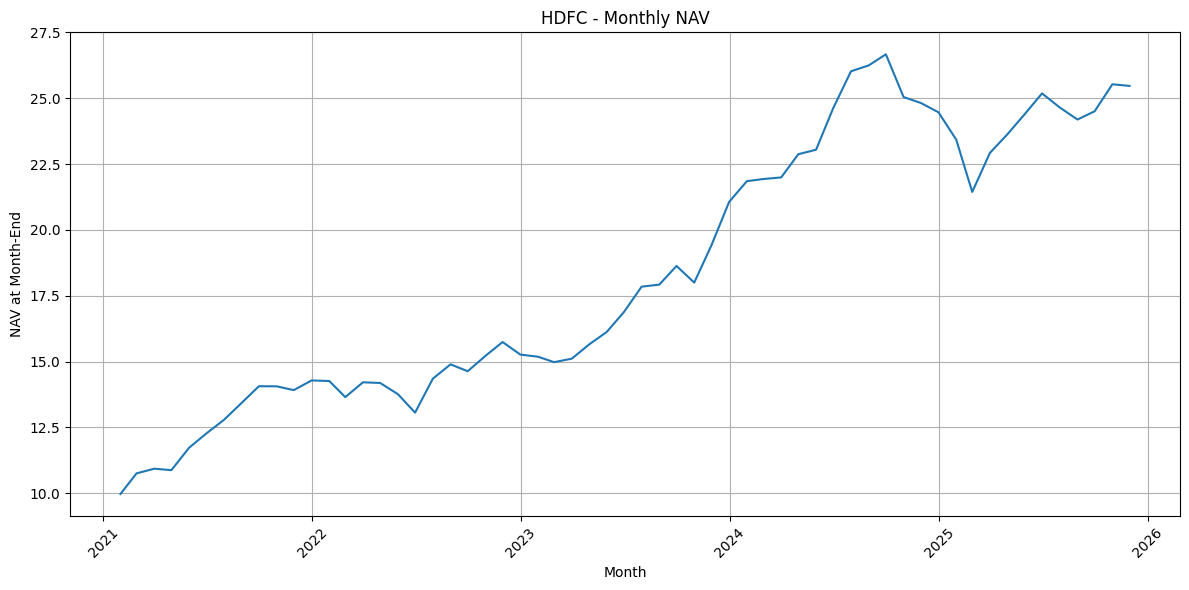

In [15]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(hdfc_monthly["month_end"], hdfc_monthly["nav_month_end"])
ax1.set_title("HDFC - Monthly NAV")
ax1.set_xlabel("Month")
ax1.set_ylabel("NAV at Month-End")
ax1.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [105]:
def load_monthly_index(sheet_name, excel_path=file_path):
    """
    Loads a daily index sheet (Date, Closing Price)
    Converts to monthly closing value + monthly returns.
    """

    df = pd.read_excel(excel_path, sheet_name=sheet_name)

    # 1) Clean column names: strip spaces + lowercase
    df.columns = df.columns.str.strip().str.lower()
    # After this, your columns become: ['date', 'closing price']

    # 2) Rename to standard names
    df = df.rename(columns={
        "date": "date",
        "closing price": "price"
    })

    # 3) Parse types
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    df["price"] = pd.to_numeric(df["price"], errors="coerce")

    # 4) Drop bad rows, sort, dedupe
    df = df.dropna(subset=["date", "price"])
    df = df.sort_values("date").drop_duplicates(subset="date").reset_index(drop=True)

    # 5) Convert to monthly (month-end price)
    monthly = (
        df.set_index("date")["price"]
        .resample("M")
        .last()
        .to_frame(name="index_month_end")
    )

    # 6) Monthly returns
    monthly["index_return"] = monthly["index_month_end"].pct_change()

    # 7) Bring date back as a column
    monthly = monthly.reset_index().rename(columns={"date": "month_end"})

    return monthly


In [19]:
nifty500_monthly = load_monthly_index("NIFTY 500", excel_path=file_path)
niftydiv_monthly = load_monthly_index("NIFTY DIVIDEND OPPORTUNITY 50", excel_path=file_path)

C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\2344607567.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")
C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\2344607567.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


In [20]:
print(nifty500_monthly.head())
print(niftydiv_monthly.head())

   month_end  index_month_end  index_return
0 2014-01-31          4709.15           NaN
1 2014-02-28          4849.50      0.029804
2 2014-03-31          5224.85      0.077400
3 2014-04-30          5255.65      0.005895
4 2014-05-31          5802.85      0.104117
   month_end  index_month_end  index_return
0 2014-01-31          1520.60           NaN
1 2014-02-28          1526.45      0.003847
2 2014-03-31          1710.75      0.120738
3 2014-04-30          1703.05     -0.004501
4 2014-05-31          1962.95      0.152609


## Load and clean the Macro-economic Indicators sheet. Assumes data is already monthly (one row per month).

### Returns a DataFrame with:
 - 'month_end' column (datetime)
 - cleaned numeric macro columns with safe names


In [106]:
def load_macro_monthly(sheet_name="Macro-economic Indicators", excel_path=file_path):

    df = pd.read_excel(excel_path, sheet_name=sheet_name)

    df.columns = df.columns.str.strip().str.lower()

    if "date" not in df.columns:
        raise ValueError("Could not find 'Date' column in macro sheet.")
    df = df.rename(columns={"date": "month_end"})

    col_map = {
        "policy repo rate": "repo_rate",
        "call money rate (weighted average)": "call_money_rate",
        "10-year g-sec par yield (fbil)": "gsec_10y_yield",
        "inr-us$ spot rate (rs. per foreign currency)": "usd_inr",
        "consumer price index rate": "cpi_rate",
        "wholesale price index rate": "wpi_rate",
        "cpi rate for industrial workers": "cpi_industrial",
        "imports (% change)": "imports_change",
        "exports (% change)": "exports_change",
    }

    df = df.rename(columns={old: new for old, new in col_map.items() if old in df.columns})

    df["month_end"] = pd.to_datetime(df["month_end"], errors="coerce")

    for col in df.columns:
        if col != "month_end":
            df[col] = pd.to_numeric(df[col], errors="coerce")

    df = df.dropna(subset=["month_end"])

    df = df.sort_values("month_end").drop_duplicates(subset="month_end").reset_index(drop=True)

    return df


### Exploring the data and macro-economics

In [107]:
macro_monthly = load_macro_monthly(excel_path=file_path)
print(macro_monthly.head())
print(macro_monthly.columns)

   month_end  repo_rate  call_money_rate  gsec_10y_yield  usd_inr  cpi_rate  \
0 2014-01-31        8.0         8.111753          8.8100  62.4768  8.604207   
1 2014-02-28        8.0         7.930000          8.8600  62.0720  7.900000   
2 2014-03-31        8.0         8.590000          8.8400  60.0998  8.200000   
3 2014-04-30        8.0         8.460000          8.8891  60.3375  8.500000   
4 2014-05-31        8.0         7.783362          8.6707  59.0335  8.281734   

   wpi_rate  cpi_industrial  imports_change  exports_change  
0      7.24        5.108632      -18.787659        4.331242  
1      6.73        5.032183      -17.470194       -4.932862  
2      6.70        5.996473        0.846501       -0.656052  
3      7.08        5.545826      -14.087352        4.524205  
4      7.02        6.184364      -11.263719       12.145503  
Index(['month_end', 'repo_rate', 'call_money_rate', 'gsec_10y_yield',
       'usd_inr', 'cpi_rate', 'wpi_rate', 'cpi_industrial', 'imports_change',
     

## Build final monthly dataset for a given bank.

### Steps:
 - Load bank monthly NAV + monthly_return
 - Load NIFTY 500 monthly data
 - Load NIFTY Dividend Opp 50 monthly data
 - Load macro monthly data
 - Merge all on 'month_end'
 - Create target: next month's bank return


In [ ]:
def build_bank_dataset(bank_sheet_name, excel_path=file_path):

    bank = load_bank_monthly(bank_sheet_name, excel_path=excel_path)

    nifty500 = load_monthly_index("NIFTY 500", excel_path=excel_path)
    niftydiv = load_monthly_index("NIFTY DIVIDEND OPPORTUNITY 50", excel_path=excel_path)

    nifty500 = nifty500.rename(columns={
        "index_month_end": "nifty500_level",
        "index_return": "nifty500_return"
    })

    niftydiv = niftydiv.rename(columns={
        "index_month_end": "niftydiv_level",
        "index_return": "niftydiv_return"
    })

    macro = load_macro_monthly(excel_path=excel_path)

    df = bank.merge(nifty500, on="month_end", how="inner")
    df = df.merge(niftydiv, on="month_end", how="inner")
    df = df.merge(macro, on="month_end", how="inner")

    df = df.sort_values("month_end").reset_index(drop=True)
    df["target_next_return"] = df["monthly_return"].shift(-1)

    df = df.dropna(subset=["target_next_return"])

    return df


In [24]:
hdfc_data  = build_bank_dataset("HDFC NAV Data", excel_path=file_path)
icici_data = build_bank_dataset("ICICI Prudential NAV Data", excel_path=file_path)
sbi_data   = build_bank_dataset("SBI NAV Data", excel_path=file_path)


C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\3537764965.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_nav = df["nav"].resample("M").last()
C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\2344607567.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")
C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\2344607567.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")
C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\3537764965.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_nav = df["nav"].resample("M").last()
C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\2344607567.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")
C:\Users\vashi\AppDa

In [110]:
print(hdfc_data.head())
print(hdfc_data.columns)

   month_end  nav_month_end  monthly_return  nifty500_level  nifty500_return  \
0 2021-01-31          9.969             NaN        11302.40        -0.018744   
1 2021-02-28         10.752        0.078543        12181.40         0.077771   
2 2021-03-31         10.930        0.016555        12313.70         0.010861   
3 2021-04-30         10.875       -0.005032        12364.35         0.004113   
4 2021-05-31         11.727        0.078345        13226.35         0.069717   

   niftydiv_level  niftydiv_return  repo_rate  call_money_rate  \
0         2839.35        -0.006300        4.0         3.227840   
1         2967.80         0.045239        4.0         3.251089   
2         3067.10         0.033459        4.0         3.249292   
3         3033.90        -0.010825        4.0         3.210782   
4         3229.60         0.064504        4.0         3.177894   

   gsec_10y_yield  usd_inr  cpi_rate  wpi_rate  cpi_industrial  \
0          5.9597  72.9519  4.061252   2.50000          

In [111]:
import pandas as pd

# ==============================
# 1. BANK DAILY → CLEAN
# ==============================

def load_and_clean_bank_nav(sheet_name, excel_path):
    """
    Load and clean NAV data for a single bank from the given Excel sheet.
    Expected columns: 'Net Asset Value', 'Date' (may have minor formatting differences).
    Returns: ['date', 'nav', 'daily_return']
    """
    df = pd.read_excel(excel_path, sheet_name=sheet_name)

    # Normalise column names
    df.columns = df.columns.str.strip().str.lower()  # e.g. 'Date ' -> 'date'

    # Map to standard names
    col_map = {}
    for col in df.columns:
        if "date" in col:
            col_map[col] = "date"
        if "net asset value" in col or "nav" in col:
            col_map[col] = "nav"

    df = df.rename(columns=col_map)

    # Keep only what we need
    df = df[["date", "nav"]]

    # Types
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    df["nav"] = pd.to_numeric(df["nav"], errors="coerce")

    # Clean
    df = df.dropna(subset=["date", "nav"])
    df = df.sort_values("date").drop_duplicates(subset="date").reset_index(drop=True)

    # Daily return
    df["daily_return"] = df["nav"].pct_change()

    return df


# ==============================
# 2. BANK DAILY → MONTHLY
# ==============================

def to_monthly_nav_and_returns(daily_df):
    """
    Convert daily NAV data to month-end NAV + monthly returns.
    Input: ['date', 'nav', 'daily_return']
    Output: ['month_end', 'nav_month_end', 'monthly_return']
    """
    df = daily_df.copy().set_index("date")

    monthly_nav = df["nav"].resample("M").last()
    monthly = monthly_nav.to_frame(name="nav_month_end")
    monthly["monthly_return"] = monthly["nav_month_end"].pct_change()

    monthly = monthly.reset_index().rename(columns={"date": "month_end"})
    return monthly


def load_bank_monthly(sheet_name, excel_path):
    """
    Wrapper: sheet name → cleaned monthly NAV + returns.
    """
    daily_df = load_and_clean_bank_nav(sheet_name, excel_path)
    monthly_df = to_monthly_nav_and_returns(daily_df)
    return monthly_df


# ==============================
# 3. INDEX SHEETS → MONTHLY
# ==============================

def load_monthly_index(sheet_name, excel_path):
    """
    Load a daily index sheet (e.g. NIFTY 500) and convert to monthly.
    Returns: ['month_end', 'index_month_end', 'index_return']
    """
    df = pd.read_excel(excel_path, sheet_name=sheet_name)

    # Normalise column names
    df.columns = df.columns.str.strip().str.lower()  # 'Date ' -> 'date', etc.

    # Standard names
    df = df.rename(columns={
        "date": "date",
        "closing price": "price"
    })

    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    df["price"] = pd.to_numeric(df["price"], errors="coerce")

    df = df.dropna(subset=["date", "price"])
    df = df.sort_values("date").drop_duplicates(subset="date").reset_index(drop=True)

    monthly = (
        df.set_index("date")["price"]
        .resample("M")
        .last()
        .to_frame(name="index_month_end")
    )

    monthly["index_return"] = monthly["index_month_end"].pct_change()
    monthly = monthly.reset_index().rename(columns={"date": "month_end"})

    return monthly


# ==============================
# 4. MACRO SHEET → MONTHLY CLEAN
# ==============================

def load_macro_monthly(sheet_name="Macro-economic Indicators", excel_path=None):
    """
    Load and clean macro sheet.
    Returns: ['month_end', repo_rate, ..., exports_change]
    """
    df = pd.read_excel(excel_path, sheet_name=sheet_name)

    df.columns = df.columns.str.strip().str.lower()

    if "date" not in df.columns:
        raise ValueError("Could not find 'Date' column in macro sheet.")

    df = df.rename(columns={"date": "month_end"})

    col_map = {
        "policy repo rate": "repo_rate",
        "call money rate (weighted average)": "call_money_rate",
        "10-year g-sec par yield (fbil)": "gsec_10y_yield",
        "inr-us$ spot rate (rs. per foreign currency)": "usd_inr",
        "consumer price index rate": "cpi_rate",
        "wholesale price index rate": "wpi_rate",
        "cpi rate for industrial workers": "cpi_industrial",
        "imports (% change)": "imports_change",
        "exports (% change)": "exports_change",
    }
    df = df.rename(columns={old: new for old, new in col_map.items() if old in df.columns})

    df["month_end"] = pd.to_datetime(df["month_end"], errors="coerce")

    for col in df.columns:
        if col != "month_end":
            df[col] = pd.to_numeric(df[col], errors="coerce")

    df = df.dropna(subset=["month_end"])
    df = df.sort_values("month_end").drop_duplicates(subset="month_end").reset_index(drop=True)

    return df


# ==============================
# 5. MASTER MERGE FOR ANY BANK
# ==============================

def build_bank_dataset(bank_sheet_name, excel_path):
    """
    Build final monthly dataset for a given bank.
    Handles different lengths automatically via inner joins on month_end.
    """
    # Bank monthly
    bank = load_bank_monthly(bank_sheet_name, excel_path)

    # Indexes
    nifty500 = load_monthly_index("NIFTY 500", excel_path)
    niftydiv = load_monthly_index("NIFTY DIVIDEND OPPORTUNITY 50", excel_path)

    nifty500 = nifty500.rename(columns={
        "index_month_end": "nifty500_level",
        "index_return": "nifty500_return"
    })
    niftydiv = niftydiv.rename(columns={
        "index_month_end": "niftydiv_level",
        "index_return": "niftydiv_return"
    })

    # Macro
    macro = load_macro_monthly(excel_path=excel_path)

    # Merge all on 'month_end'
    df = bank.merge(nifty500, on="month_end", how="inner")
    df = df.merge(niftydiv, on="month_end", how="inner")
    df = df.merge(macro, on="month_end", how="inner")

    # Sort by time
    df = df.sort_values("month_end").reset_index(drop=True)

    # Create next-month target
    df["target_next_return"] = df["monthly_return"].shift(-1)

    # Drop last row (no next month)
    df = df.dropna(subset=["target_next_return"])

    return df

In [112]:
hdfc_data  = build_bank_dataset("HDFC NAV Data", excel_path=file_path)
icici_data = build_bank_dataset("ICICI Prudential NAV Data", excel_path=file_path)
sbi_data   = build_bank_dataset("SBI NAV Data", excel_path=file_path)

print("HDFC:", hdfc_data.shape)
print("ICICI:", icici_data.shape)
print("SBI:  ", sbi_data.shape)

hdfc_data.head()

C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\2311508144.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_nav = df["nav"].resample("M").last()
C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\2311508144.py:102: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")
C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\2311508144.py:102: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")
C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\2311508144.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_nav = df["nav"].resample("M").last()
C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\2311508144.py:102: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")
C:\Users\vashi\Ap

HDFC: (55, 17)
ICICI: (135, 17)
SBI:   (29, 17)


C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\2311508144.py:102: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


,month_end,nav_month_end,monthly_return,nifty500_level,nifty500_return,niftydiv_level,niftydiv_return,repo_rate,call_money_rate,gsec_10y_yield,usd_inr,cpi_rate,wpi_rate,cpi_industrial,imports_change,exports_change,target_next_return
0,2021-01-31,9.969,NaN,11302.40,-0.018744,2839.35,-0.006300,4.0,3.227840,5.9597,72.9519,4.061252,2.50000,3.15,2.1,6.5,0.078543
1,2021-02-28,10.752,0.078543,12181.40,0.077771,2967.80,0.045239,4.0,3.251089,6.3358,73.0408,5.030181,4.80000,4.48,7.5,-0.4,0.016555
2,2021-03-31,10.930,0.016555,12313.70,0.010861,3067.10,0.033459,4.0,3.249292,6.3400,72.4046,5.500000,7.92027,5.64,55.4,64.1,-0.005032
3,2021-04-30,10.875,-0.005032,12364.35,0.004113,3033.90,-0.010825,4.0,3.210782,6.2551,74.0232,4.200000,10.70000,5.14,169.5,202.6,0.078345
4,2021-05-31,11.727,0.078345,13226.35,0.069717,3229.60,0.064504,4.0,3.177894,6.2800,72.4767,6.295560,13.10000,5.24,69.9,68.3,0.045962


# 📊 Automated Exploratory Data Analysis (EDA) Pipeline

This function `eda_report` constructs a **fully automated EDA pipeline** for structured financial or time-series datasets (such as bank stock data). It performs **statistical analysis, visualization, feature relationship analysis, and feature relevance estimation** in one unified workflow.

---

## ✅ Purpose of This Pipeline

This EDA function is designed to:
- Inspect dataset structure and data quality
- Analyze numerical distributions and volatility
- Visualize time-based trends
- Detect linear relationships using correlation
- Measure **non-linear feature importance** using Mutual Information

It is optimized for **financial datasets with time-based columns and predictive targets**.

---

## ✅ Libraries Used

- `pandas` → Data manipulation  
- `matplotlib` → Core plotting  
- `seaborn` → Statistical visualizations  
- `sklearn.feature_selection` → Mutual Information  
- `numpy` → Numerical operations  

---

## ✅ Function Parameters

```python
eda_report(df, bank_name="Bank")


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
import numpy as np

def eda_report(df, bank_name="Bank"):
    """
    Complete EDA:
    - Summary stats
    - Missing values
    - Histograms + KDE for all numeric columns
    - Time trend plots for all numeric columns with month_end
    - Correlation heatmap
    - Mutual information bar chart
    """

    print("\n============================")
    print(f"   EDA REPORT: {bank_name}")
    print("============================\n")

    # ---------------------------
    # 1. BASIC SUMMARY
    # ---------------------------
    print("▶ SHAPE:", df.shape, "\n")
    print("▶ COLUMNS:", df.columns.tolist(), "\n")
    print("▶ MISSING VALUES:\n", df.isna().sum(), "\n")
    print("▶ SUMMARY STATISTICS (numeric only):\n", df.select_dtypes(include="number").describe(), "\n")

    # Rank columns by volatility (numeric only)
    print("▶ VOLATILITY (STD DEV, highest first):\n")
    num_for_vol = df.select_dtypes(include="number")
    print(num_for_vol.std().sort_values(ascending=False), "\n")

    # Identify numeric columns for rest of plots
    numeric_cols = df.select_dtypes(include="number").columns.tolist()

    # We exclude date-like numerics if any slipped in (month_end is datetime, so not here, but just in case)
    if "month_end" in numeric_cols:
        numeric_cols.remove("month_end")

    # ---------------------------
    # 2. HISTOGRAM + KDE
    # ---------------------------
    print("▶ GENERATING HISTOGRAM + KDE PLOTS...\n")

    for col in numeric_cols:
        plt.figure(figsize=(10, 4))
        sns.histplot(df[col].dropna(), kde=True, bins=30)
        plt.title(f"{bank_name} — Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

    # ---------------------------
    # 3. TIME TREND PLOTS
    # ---------------------------
    print("▶ GENERATING TIME TREND PLOTS...\n")

    if "month_end" not in df.columns:
        print("No 'month_end' column found for time plots, skipping time trends.\n")
    else:
        for col in numeric_cols:
            plt.figure(figsize=(12, 4))
            plt.plot(df["month_end"], df[col])
            plt.title(f"{bank_name} — Time Trend of {col}")
            plt.xlabel("Month")
            plt.ylabel(col)
            plt.grid(True)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

    # ---------------------------
    # 4. CORRELATION HEATMAP
    # ---------------------------
    print("▶ PLOTTING CORRELATION HEATMAP...\n")

    cols_for_corr = numeric_cols.copy()
    if "target_next_return" in df.columns and "target_next_return" not in cols_for_corr:
        cols_for_corr.append("target_next_return")

    if len(cols_for_corr) > 1:
        plt.figure(figsize=(12, 8))
        corr = df[cols_for_corr].corr()
        sns.heatmap(corr, annot=False, cmap="coolwarm", fmt=".2f")
        plt.title(f"{bank_name} — Correlation Heatmap")
        plt.show()
    else:
        print("Not enough numeric columns for correlation heatmap.\n")

    # ---------------------------
    # 5. MUTUAL INFORMATION BAR CHART
    # ---------------------------
    print("▶ CALCULATING MUTUAL INFORMATION...\n")

    if "target_next_return" in df.columns:
        features_for_mi = [c for c in numeric_cols if c != "target_next_return"]

        if len(features_for_mi) > 0:
            X = df[features_for_mi].fillna(0)
            y = df["target_next_return"].fillna(0)

            mi_scores = mutual_info_regression(X, y)
            mi_series = pd.Series(mi_scores, index=features_for_mi).sort_values(ascending=False)

            plt.figure(figsize=(10, 5))
            sns.barplot(x=mi_series.values, y=mi_series.index)
            plt.title(f"{bank_name} — Mutual Information Scores")
            plt.xlabel("MI Score")
            plt.ylabel("Feature")
            plt.grid(True)
            plt.show()

            print("\n▶ MUTUAL INFORMATION SCORES:\n")
            print(mi_series)
        else:
            print("No features available for MI (after excluding target).\n")
    else:
        print("No 'target_next_return' column found; skipping Mutual Information.\n")

    print("\n============================")
    print(f" EDA COMPLETE FOR {bank_name}")
    print("============================\n")



   EDA REPORT: HDFC

▶ SHAPE: (55, 17) 

▶ COLUMNS: ['month_end', 'nav_month_end', 'monthly_return', 'nifty500_level', 'nifty500_return', 'niftydiv_level', 'niftydiv_return', 'repo_rate', 'call_money_rate', 'gsec_10y_yield', 'usd_inr', 'cpi_rate', 'wpi_rate', 'cpi_industrial', 'imports_change', 'exports_change', 'target_next_return'] 

▶ MISSING VALUES:
 month_end             0
nav_month_end         0
monthly_return        1
nifty500_level        0
nifty500_return       0
niftydiv_level        0
niftydiv_return       0
repo_rate             0
call_money_rate       0
gsec_10y_yield        1
usd_inr               0
cpi_rate              0
wpi_rate              0
cpi_industrial        0
imports_change        0
exports_change        0
target_next_return    0
dtype: int64 

▶ SUMMARY STATISTICS (numeric only):
        nav_month_end  monthly_return  nifty500_level  nifty500_return  \
count      55.000000       54.000000       55.000000        55.000000   
mean       17.896764        0.01767

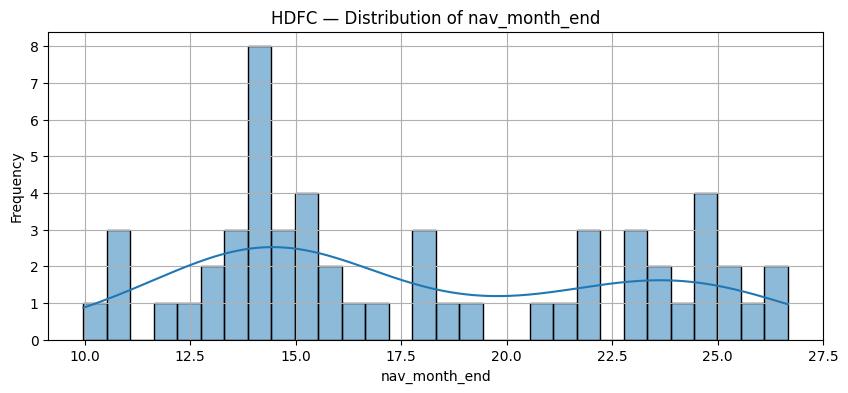

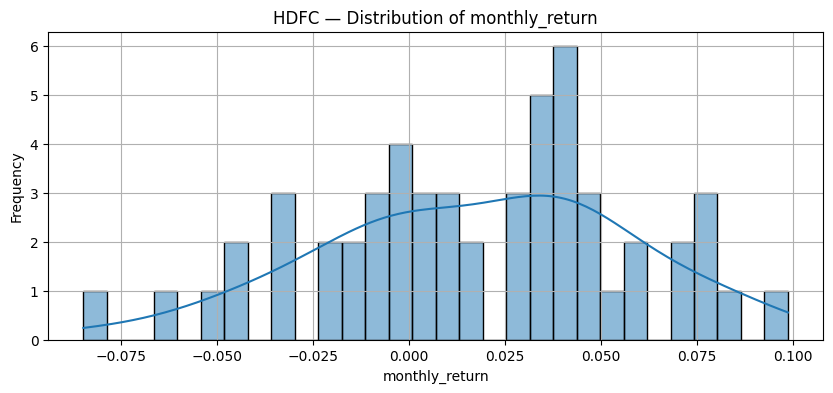

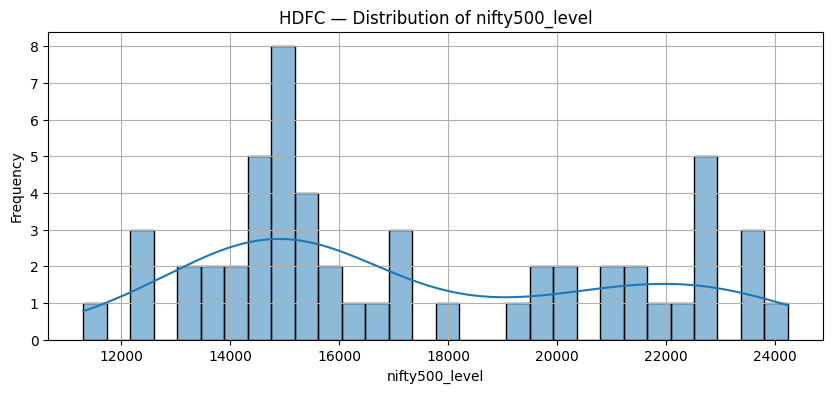

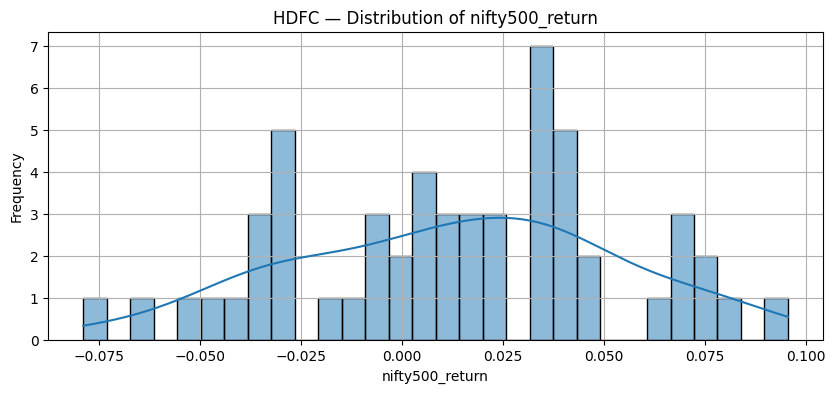

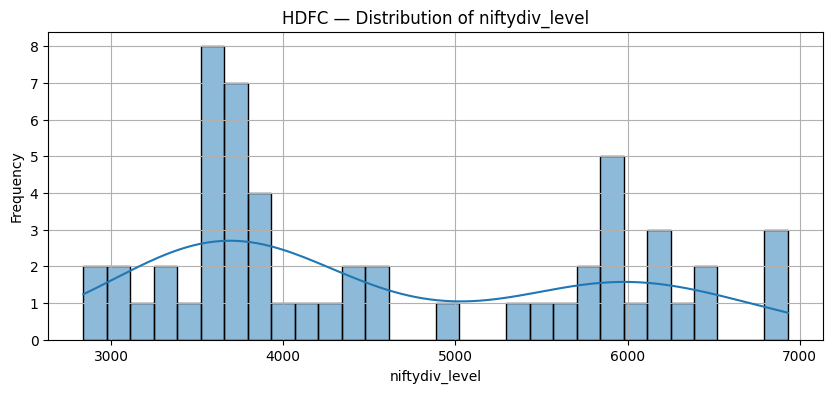

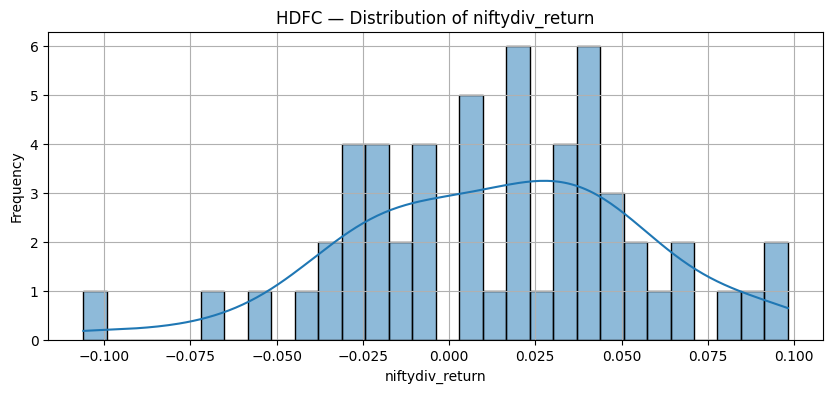

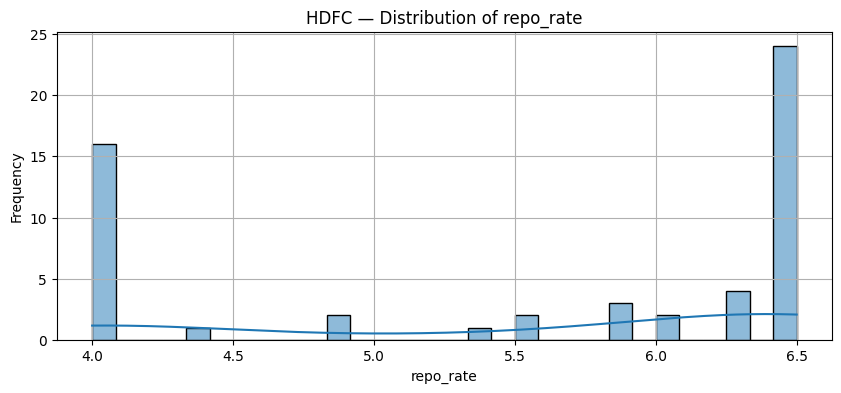

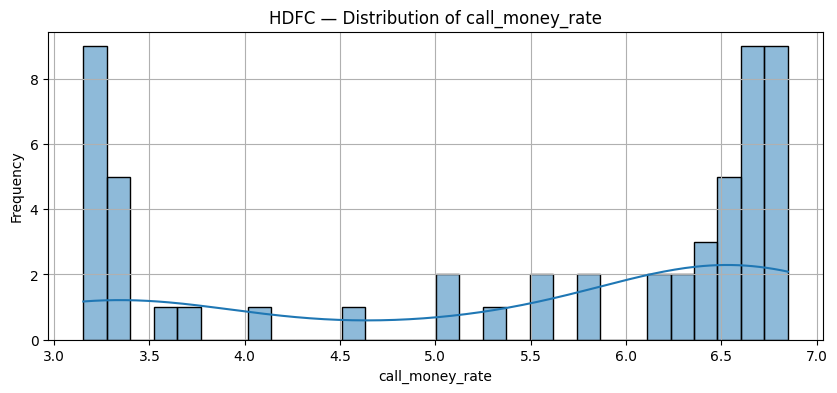

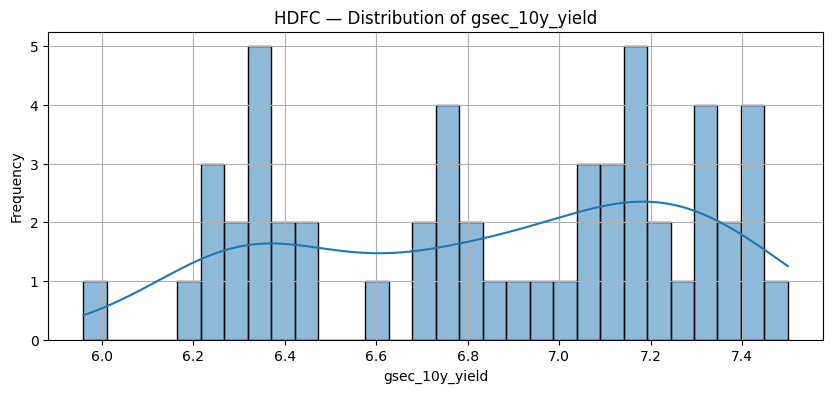

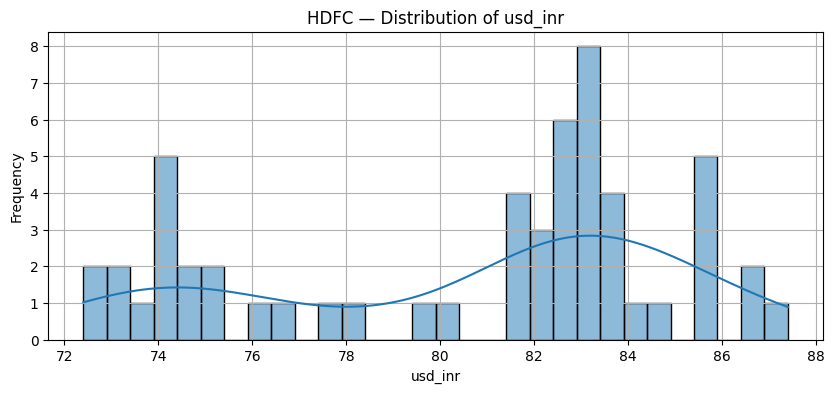

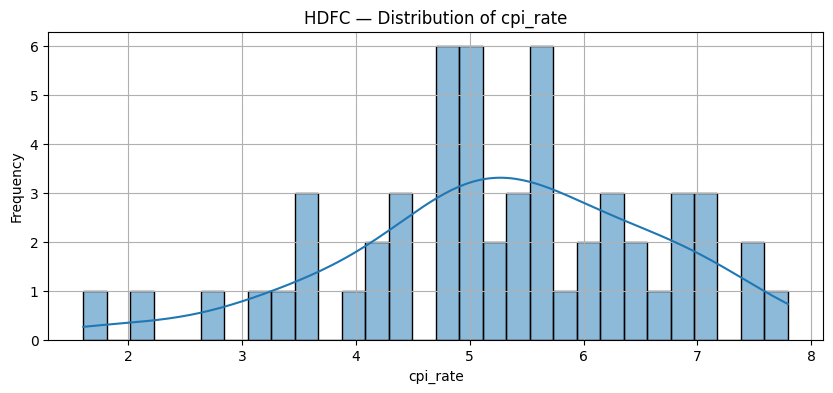

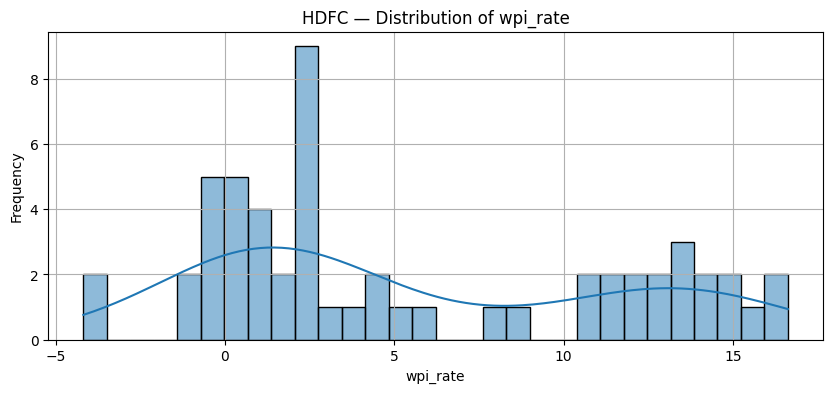

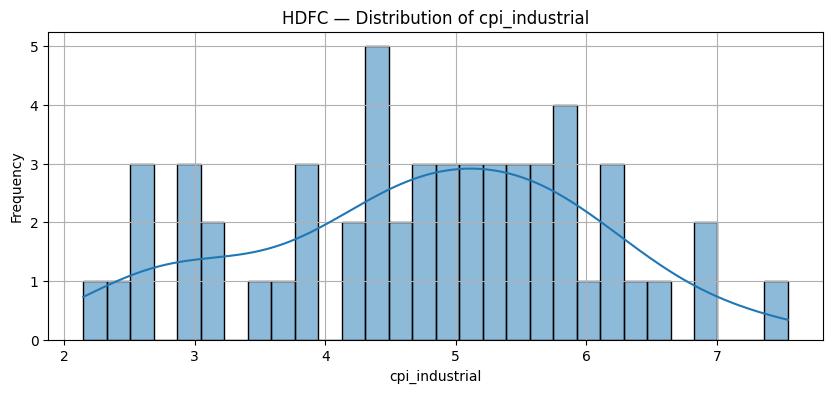

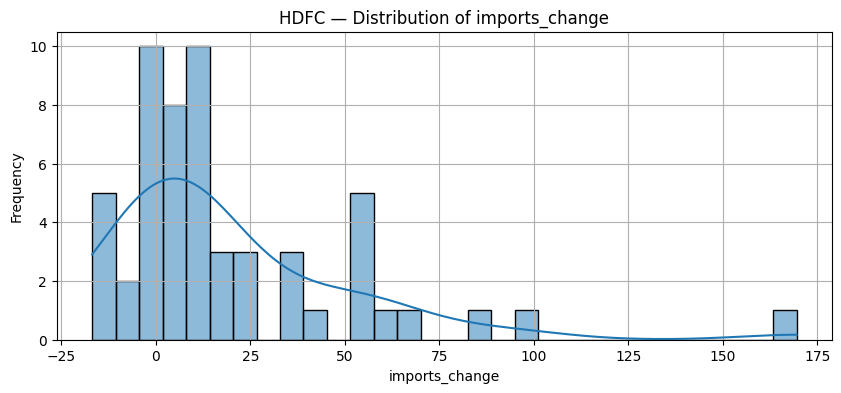

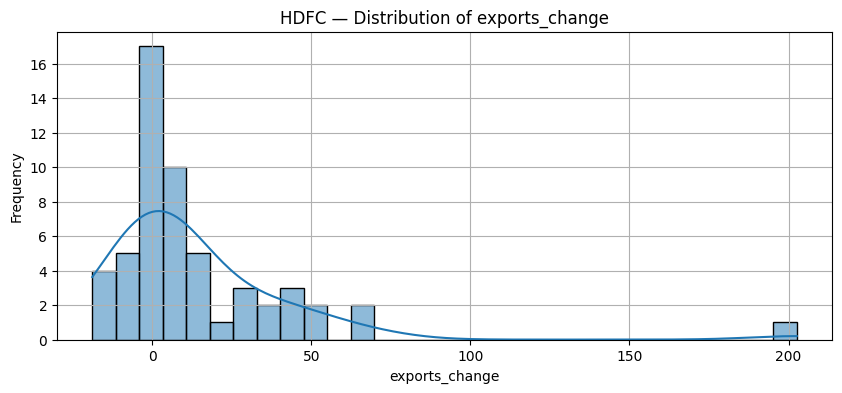

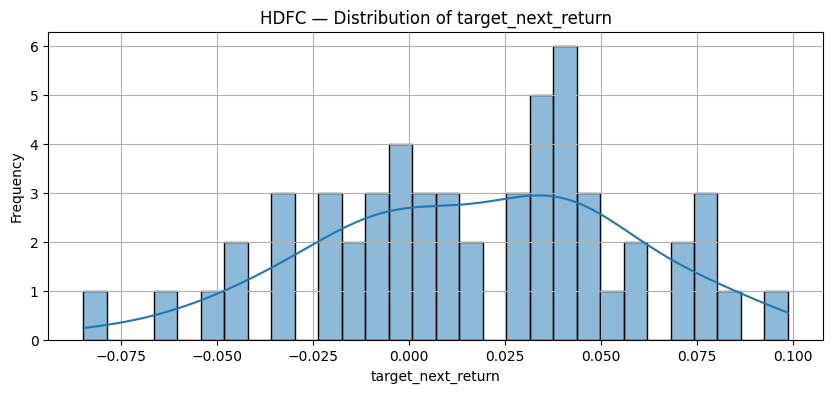

▶ GENERATING TIME TREND PLOTS...



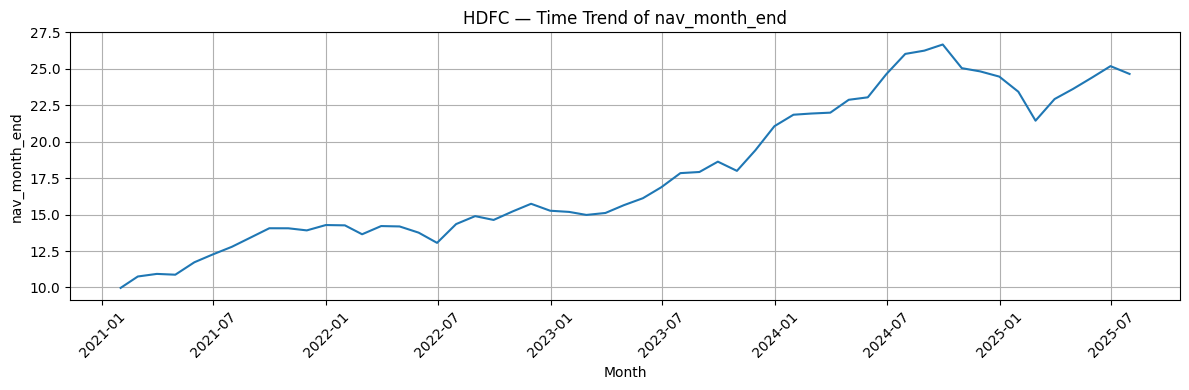

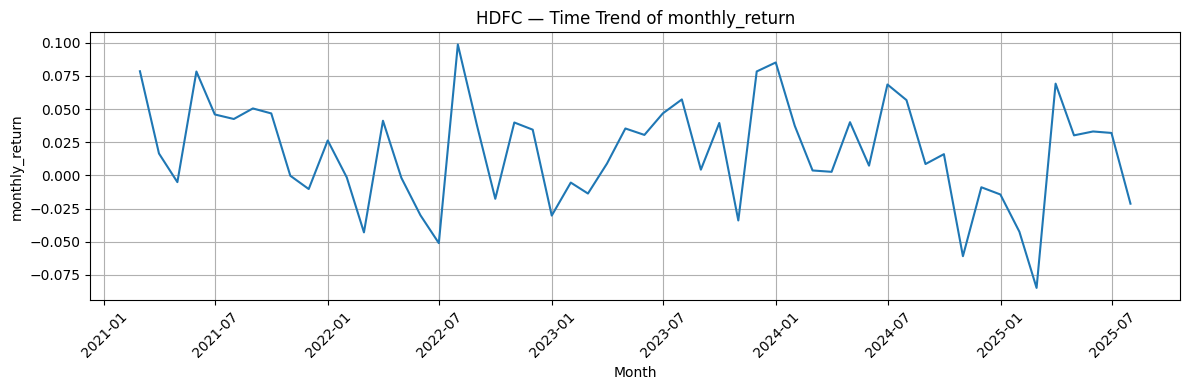

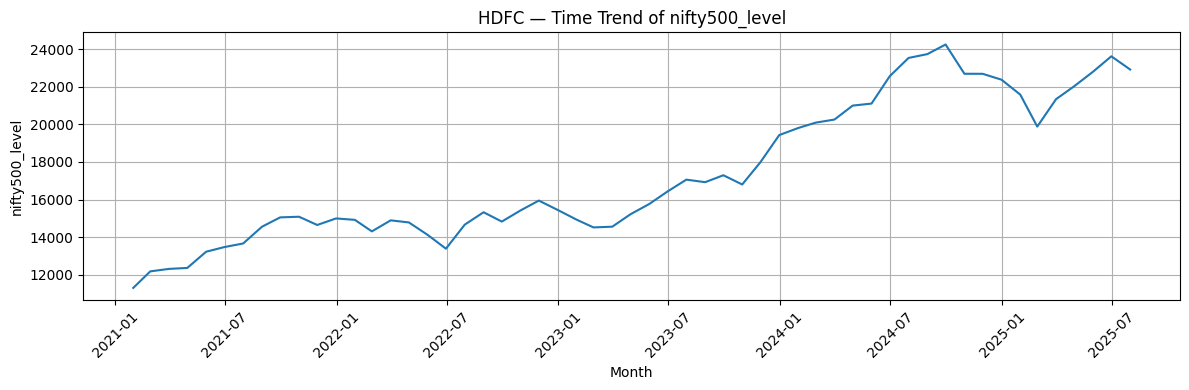

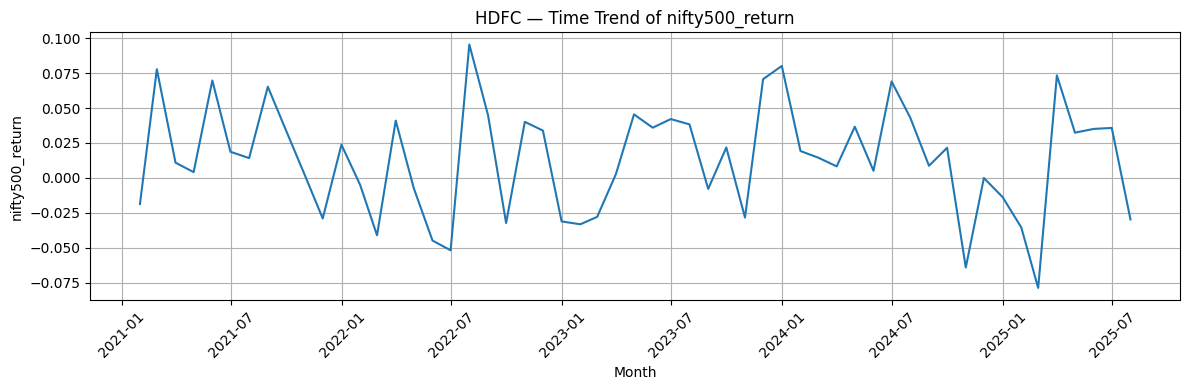

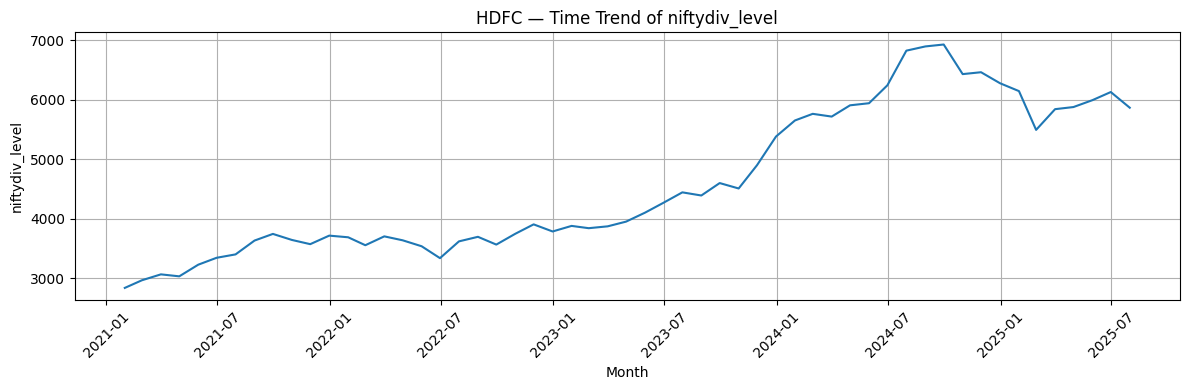

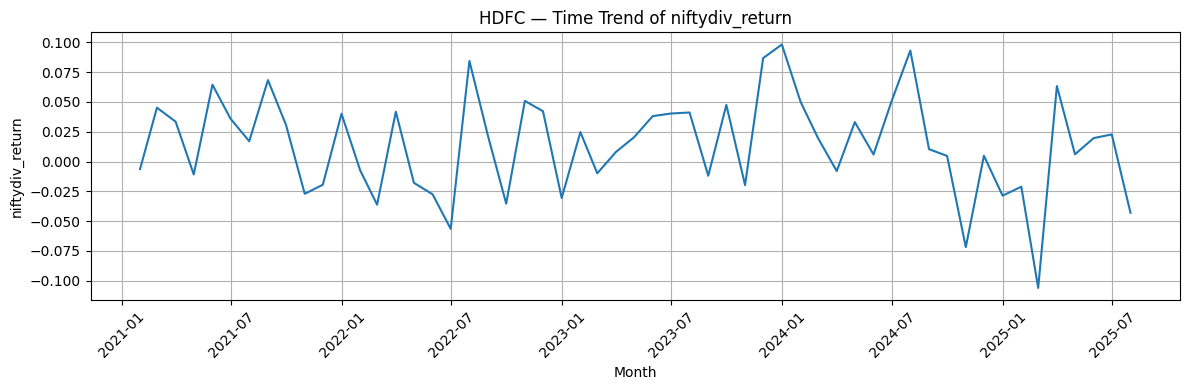

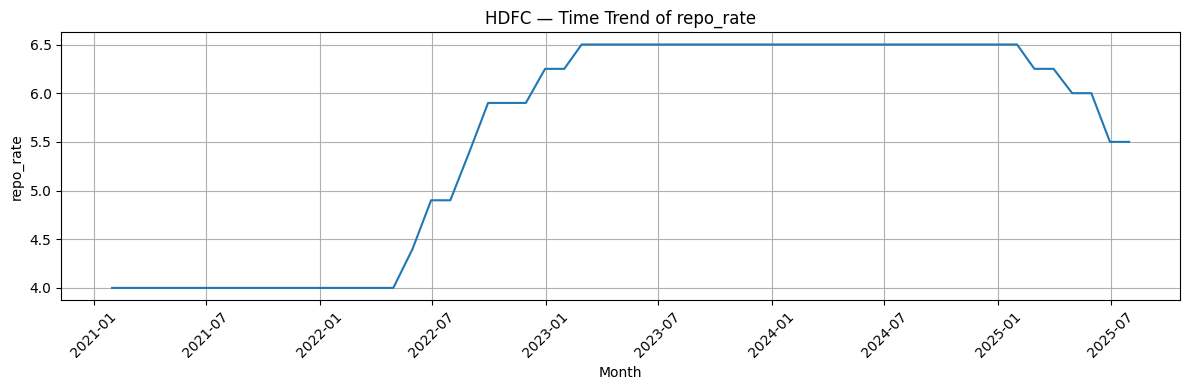

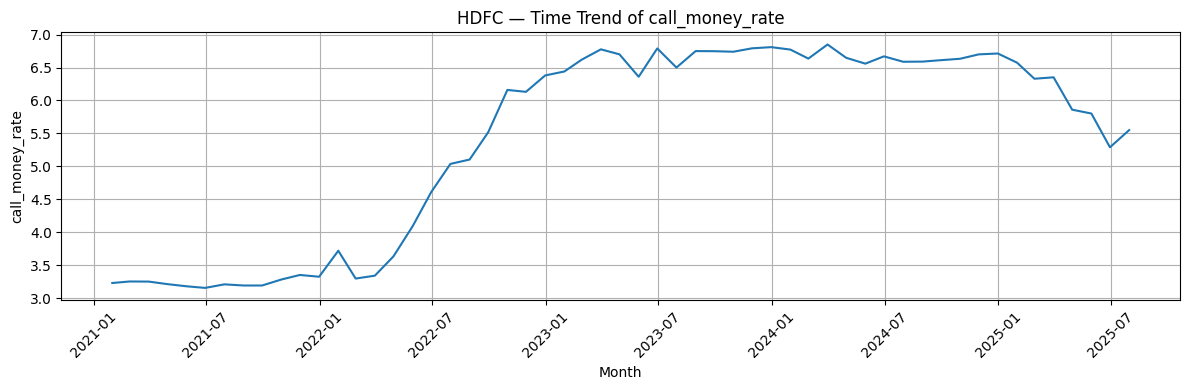

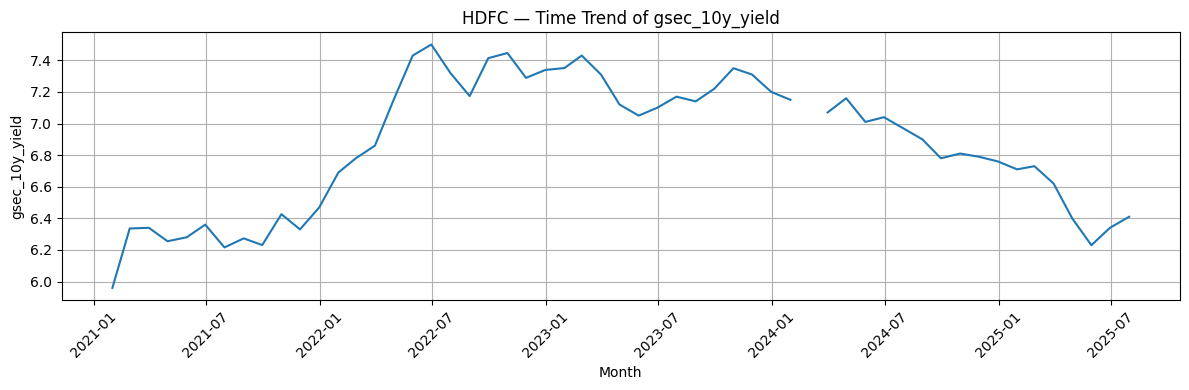

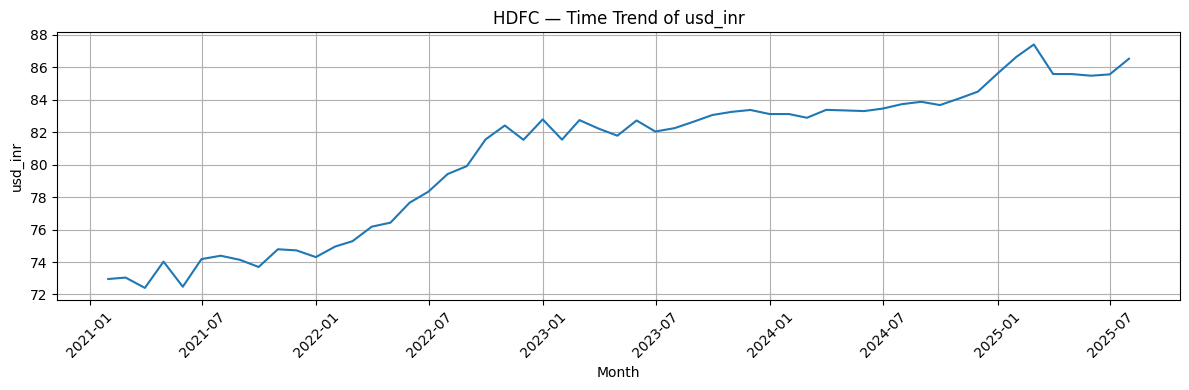

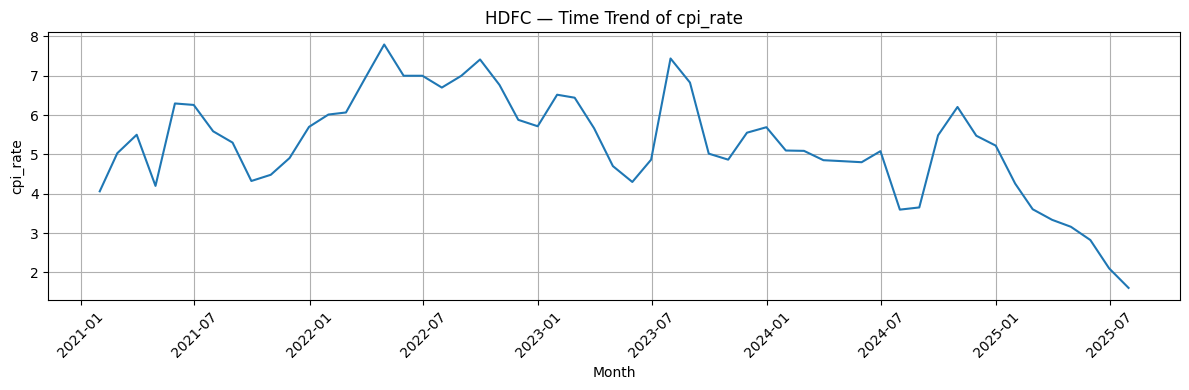

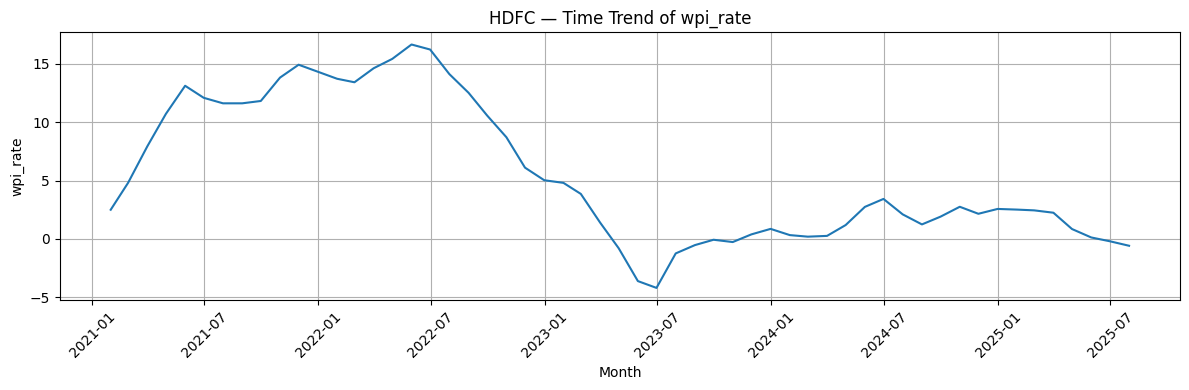

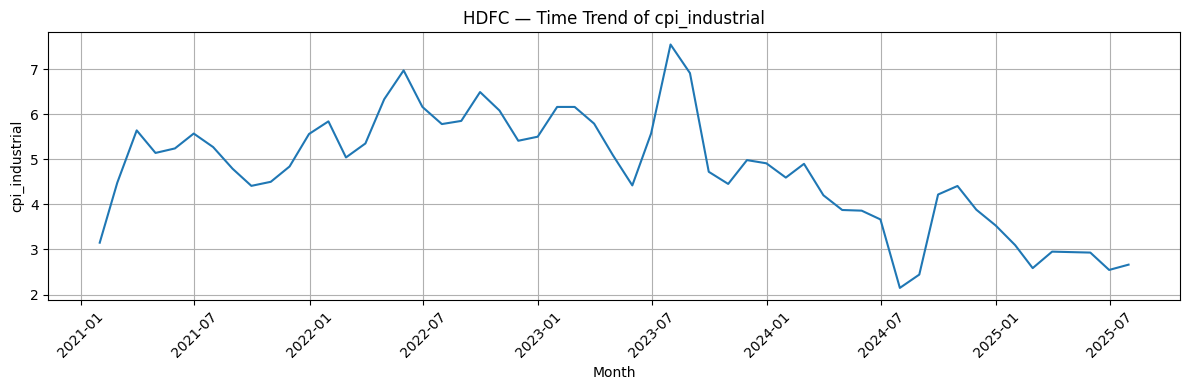

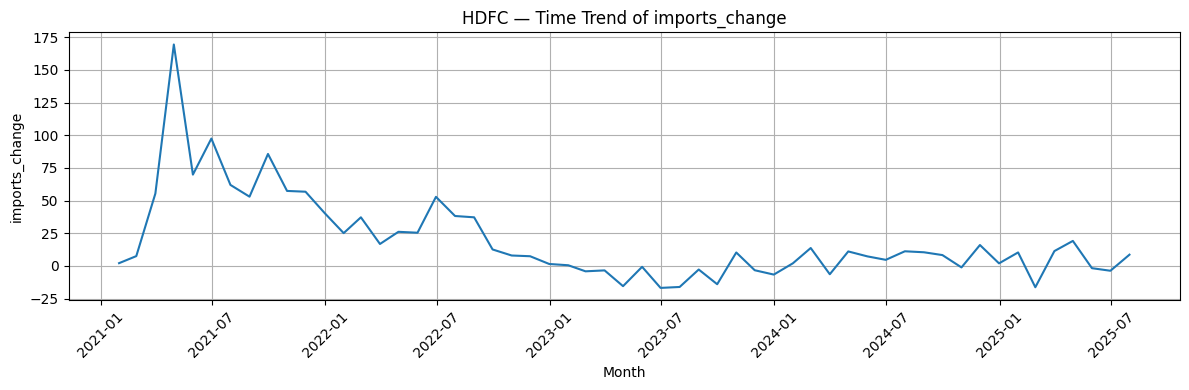

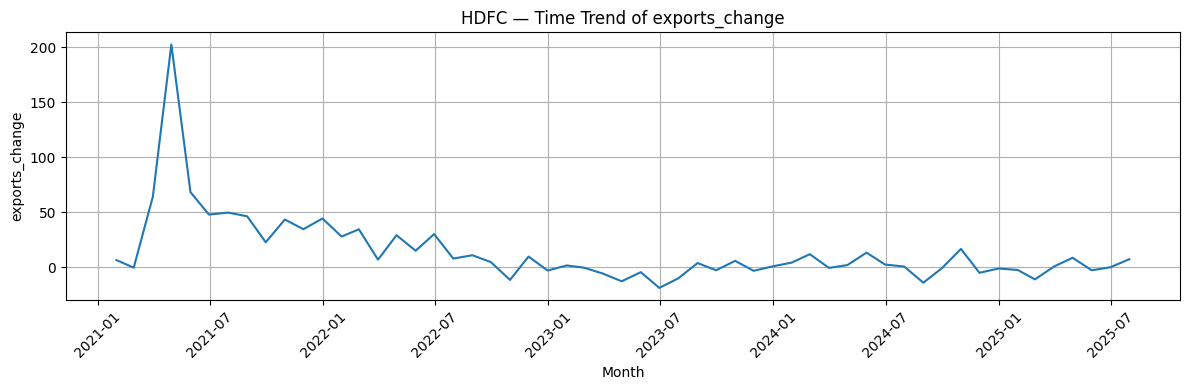

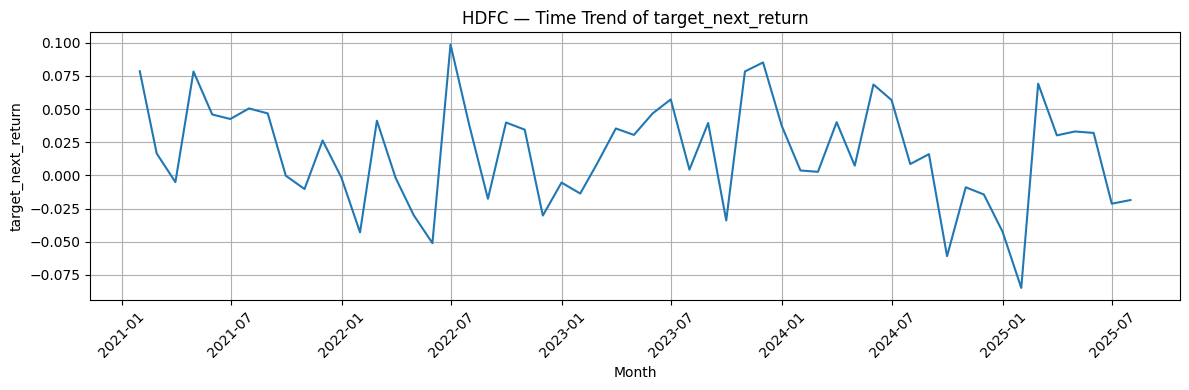

▶ PLOTTING CORRELATION HEATMAP...



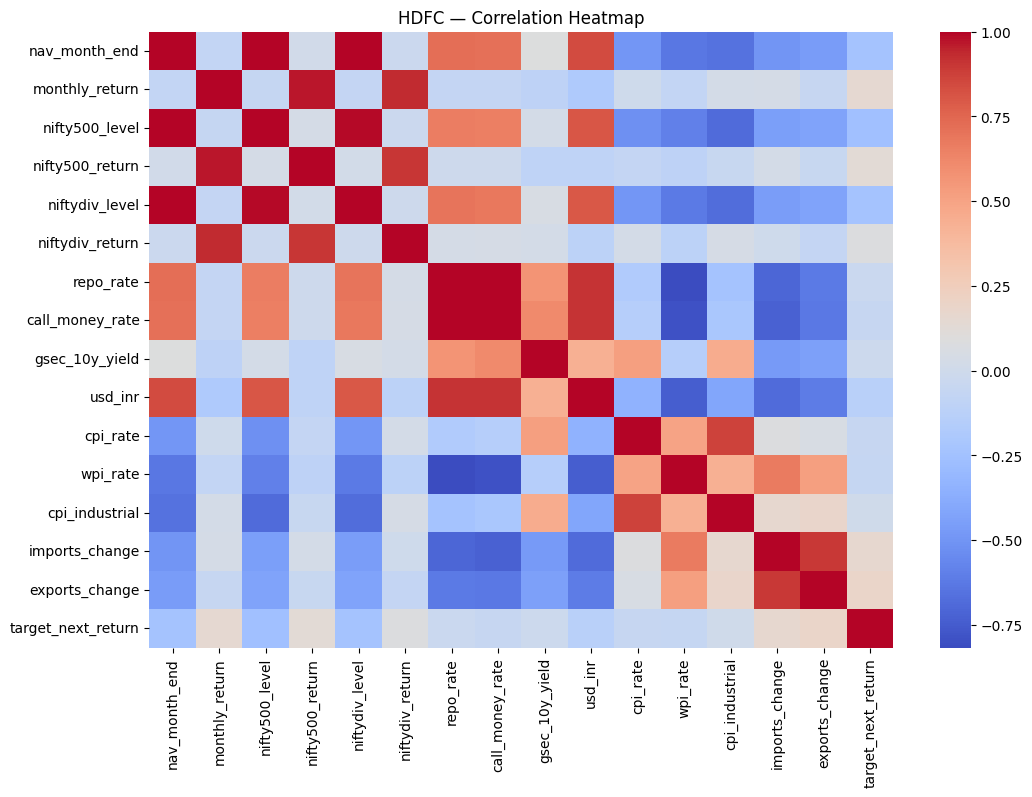

▶ CALCULATING MUTUAL INFORMATION...



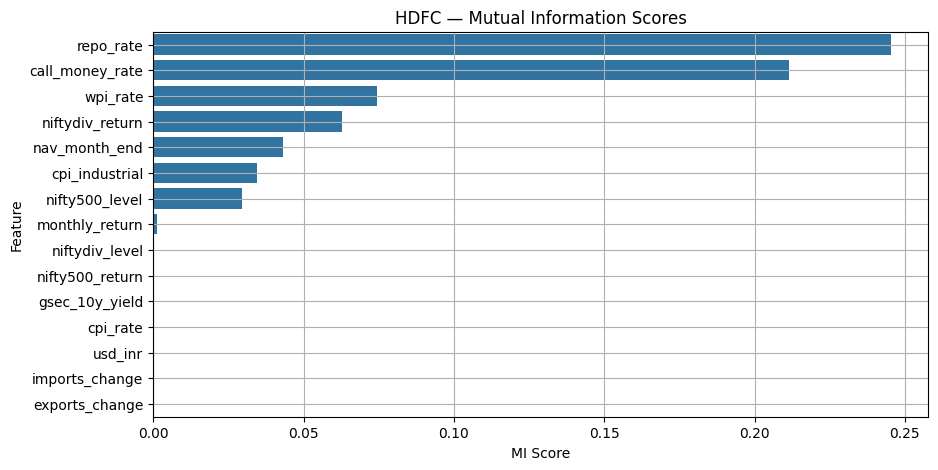


▶ MUTUAL INFORMATION SCORES:

repo_rate          0.245451
call_money_rate    0.211362
wpi_rate           0.074588
niftydiv_return    0.062775
nav_month_end      0.043304
cpi_industrial     0.034394
nifty500_level     0.029572
monthly_return     0.001323
niftydiv_level     0.000000
nifty500_return    0.000000
gsec_10y_yield     0.000000
cpi_rate           0.000000
usd_inr            0.000000
imports_change     0.000000
exports_change     0.000000
dtype: float64

 EDA COMPLETE FOR HDFC



In [29]:
eda_report(hdfc_data, "HDFC")
#eda_report(icici_data, "ICICI")
#eda_report(sbi_data, "SBI")

# Training a Simple Linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

def train_naive_regression(df, feature_cols, target_col="target_next_return", test_size=0.2):

    # Drop rows with missing values in features or target
    data = df.dropna(subset=feature_cols + [target_col]).copy()

    # Extract X and y
    X = data[feature_cols].values
    y = data[target_col].values

    # Time-based train-test split (no shuffle)
    split_idx = int(len(data) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    train_dates = data["month_end"].values[:split_idx]
    test_dates = data["month_end"].values[split_idx:]

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Metrics
    metrics = {
        "train_rmse": np.sqrt(mean_squared_error(y_train, train_pred)),
        "test_rmse": np.sqrt(mean_squared_error(y_test, test_pred)),
        "train_mae": mean_absolute_error(y_train, train_pred),
        "test_mae": mean_absolute_error(y_test, test_pred),
        "train_r2": r2_score(y_train, train_pred),
        "test_r2": r2_score(y_test, test_pred),
    }

    # Prediction DataFrame
    pred_df = pd.DataFrame({
        "month_end": test_dates,
        "actual_next_return": y_test,
        "predicted_next_return": test_pred
    })

    return model, metrics, pred_df


In [32]:
features_B = [
    'repo_rate', 'call_money_rate', 'wpi_rate', 'cpi_industrial',
    'nifty500_return', 'niftydiv_return'
]

hdfc_model_naive, hdfc_metrics_naive, hdfc_pred_naive = train_naive_regression(
    hdfc_data,
    feature_cols=features_B,
    target_col="target_next_return",
    test_size=0.25     # 25% test split
)

hdfc_metrics_naive

{'train_rmse': np.float64(0.0332734887189441),
 'test_rmse': np.float64(0.06620522351813732),
 'train_mae': 0.028540918824765723,
 'test_mae': 0.055186639286292936,
 'train_r2': 0.16846781605032768,
 'test_r2': -1.439268456436718}

In [33]:
hdfc_metrics_naive

{'train_rmse': np.float64(0.0332734887189441),
 'test_rmse': np.float64(0.06620522351813732),
 'train_mae': 0.028540918824765723,
 'test_mae': 0.055186639286292936,
 'train_r2': 0.16846781605032768,
 'test_r2': -1.439268456436718}

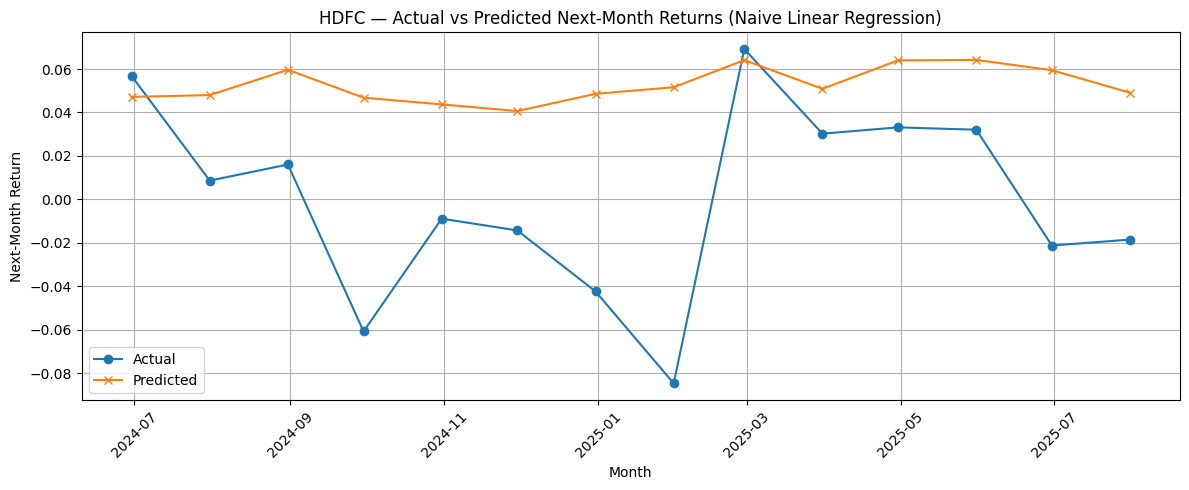

In [34]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted_time(pred_df, bank_name="HDFC", model_name="Naive Linear Regression"):
    """
    pred_df must have:
      - 'month_end'
      - 'actual_next_return'
      - 'predicted_next_return'
    """
    plt.figure(figsize=(12, 5))

    plt.plot(pred_df["month_end"], pred_df["actual_next_return"], label="Actual", marker="o")
    plt.plot(pred_df["month_end"], pred_df["predicted_next_return"], label="Predicted", marker="x")

    plt.title(f"{bank_name} — Actual vs Predicted Next-Month Returns ({model_name})")
    plt.xlabel("Month")
    plt.ylabel("Next-Month Return")
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Use it for HDFC naive model
plot_actual_vs_predicted_time(hdfc_pred_naive, bank_name="HDFC", model_name="Naive Linear Regression")


In [35]:
model_A_metrics = hdfc_metrics_naive
model_A_predictions = hdfc_pred_naive


### Linear Regression model seemed to not work best hence switching to Ridge and Lasso Regression

In [36]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def train_regularized_model(df, feature_cols, model_type="ridge", alpha=1.0, test_size=0.2):
    """
    Train Ridge or Lasso regression with scaling.
    """

    data = df.dropna(subset=feature_cols + ["target_next_return"]).copy()

    X = data[feature_cols].values
    y = data["target_next_return"].values

    # Time-based split
    split_idx = int(len(data) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    test_dates = data["month_end"].values[split_idx:]

    # Choose model
    if model_type == "ridge":
        model = Ridge(alpha=alpha)
    else:
        model = Lasso(alpha=alpha)

    # Pipeline = Scaling + Model
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("regressor", model)
    ])

    pipe.fit(X_train, y_train)

    train_pred = pipe.predict(X_train)
    test_pred = pipe.predict(X_test)

    metrics = {
        "train_rmse": np.sqrt(mean_squared_error(y_train, train_pred)),
        "test_rmse": np.sqrt(mean_squared_error(y_test, test_pred)),
        "train_mae": mean_absolute_error(y_train, train_pred),
        "test_mae": mean_absolute_error(y_test, test_pred),
        "train_r2": r2_score(y_train, train_pred),
        "test_r2": r2_score(y_test, test_pred),
    }

    pred_df = pd.DataFrame({
        "month_end": test_dates,
        "actual_next_return": y_test,
        "predicted_next_return": test_pred
    })

    return pipe, metrics, pred_df

In [37]:
ridge_model, ridge_metrics, ridge_pred = train_regularized_model(
    hdfc_data,
    features_B,
    model_type="ridge",
    alpha=1.0
)

In [38]:
lasso_model, lasso_metrics, lasso_pred = train_regularized_model(
    hdfc_data,
    features_B,
    model_type="lasso",
    alpha=0.01
)

In [39]:
ridge_metrics

{'train_rmse': np.float64(0.03326911229611309),
 'test_rmse': np.float64(0.06568088663281302),
 'train_mae': 0.028587470684463413,
 'test_mae': 0.054971662113814455,
 'train_r2': 0.13011159858214838,
 'test_r2': -1.2684014960263656}

In [40]:
lasso_metrics


{'train_rmse': np.float64(0.03567052019325808),
 'test_rmse': np.float64(0.05356363066267793),
 'train_mae': 0.030138637571368296,
 'test_mae': 0.044132806931373045,
 'train_r2': 0.0,
 'test_r2': -0.5086271705404706}

### Comparing both the models with actual values to check accuracy

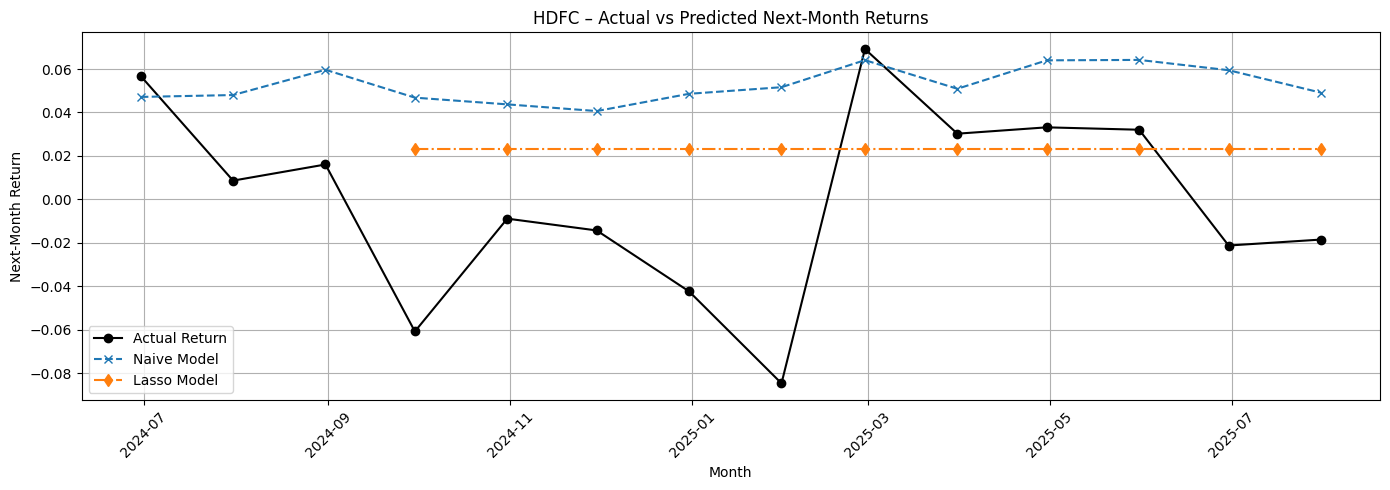

In [41]:
def compare_models_time(
    pred_a, pred_b,
    bank_name="HDFC",
    model_a_name="Naive Linear Regression",
    model_b_name="Lasso Regression"
):
    plt.figure(figsize=(14, 5))

    # Actual values
    plt.plot(pred_a["month_end"], pred_a["actual_next_return"],
             label="Actual Return", marker="o", color="black")

    # Model A predictions
    plt.plot(pred_a["month_end"], pred_a["predicted_next_return"],
             label=model_a_name, marker="x", linestyle="--")

    # Model B predictions
    plt.plot(pred_b["month_end"], pred_b["predicted_next_return"],
             label=model_b_name, marker="d", linestyle="-.")

    plt.title(f"{bank_name} – Actual vs Predicted Next-Month Returns")
    plt.xlabel("Month")
    plt.ylabel("Next-Month Return")
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Use it:
compare_models_time(hdfc_pred_naive, lasso_pred, 
                    bank_name="HDFC",
                    model_a_name="Naive Model", 
                    model_b_name="Lasso Model")


In [42]:
comparison_df = pd.DataFrame([
    ["Naive Linear Regression",
     hdfc_metrics_naive["train_rmse"], hdfc_metrics_naive["test_rmse"],
     hdfc_metrics_naive["train_mae"], hdfc_metrics_naive["test_mae"],
     hdfc_metrics_naive["train_r2"], hdfc_metrics_naive["test_r2"]],
    
    ["Ridge Regression",
     ridge_metrics["train_rmse"], ridge_metrics["test_rmse"],
     ridge_metrics["train_mae"], ridge_metrics["test_mae"],
     ridge_metrics["train_r2"], ridge_metrics["test_r2"]],
    
    ["Lasso Regression",
     lasso_metrics["train_rmse"], lasso_metrics["test_rmse"],
     lasso_metrics["train_mae"], lasso_metrics["test_mae"],
     lasso_metrics["train_r2"], lasso_metrics["test_r2"]]
],
columns=["Model", "Train RMSE", "Test RMSE",
         "Train MAE", "Test MAE",
         "Train R²", "Test R²"])

comparison_df


,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R²,Test R²
0,Naive Linear Regression,0.033273,0.066205,0.028541,0.055187,0.168468,-1.439268
1,Ridge Regression,0.033269,0.065681,0.028587,0.054972,0.130112,-1.268401
2,Lasso Regression,0.035671,0.053564,0.030139,0.044133,0.000000,-0.508627


# 🔄 Transition from Regression to Trend Classification

After experimenting with **Linear Regression** and **Lasso Regression**, we observed that:

- The dataset does **not exhibit strong continuous linear relationships**
- Market behavior is **highly volatile and noisy**
- Predicting **exact numerical returns** is unreliable under current conditions

Because of this, we **shifted from a regression-based forecasting approach to a classification-based trend prediction approach**, where the goal is to predict **direction instead of magnitude**.

---

## ✅ New Objective

Instead of predicting the exact return value, we now predict:

- **1 → Next month’s return will be POSITIVE (UP trend)**
- **0 → Next month’s return will be ZERO or NEGATIVE (DOWN or FLAT trend)**

This reformulation:
- Makes the problem **more robust to noise**
- Better matches **real-world trading decision-making**
- Improves **model stability and performance**

---

## 🔧 Target Variable Engineering

```python
# 1 = next month will be UP (positive return)
# 0 = next month will be DOWN or flat (zero/negative return)
hdfc_data["target_trend"] = (hdfc_data["target_next_return"] > 0).astype(int)


In [114]:
# 1 = next month will be UP (positive return)
# 0 = next month will be DOWN or flat (zero/negative return)
hdfc_data["target_trend"] = (hdfc_data["target_next_return"] > 0).astype(int)

# Optional: check class balance
print(hdfc_data["target_trend"].value_counts())
print(hdfc_data[["target_next_return", "target_trend"]].head())

target_trend
1    35
0    20
Name: count, dtype: int64
   target_next_return  target_trend
0            0.078543             1
1            0.016555             1
2           -0.005032             0
3            0.078345             1
4            0.045962             1


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

def train_classifier(df, feature_cols, model_type="logistic", test_size=0.2):
    """
    Train a classification model to predict trend (UP/DOWN).
    Supported models: logistic, rf, gb
    """
    
    # Drop missing
    data = df.dropna(subset=feature_cols + ["target_trend"]).copy()
    
    X = data[feature_cols].values
    y = data["target_trend"].values
    
    # Time-split (no shuffle)
    split_idx = int(len(data) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    test_dates = data["month_end"].values[split_idx:]

    # Choose model
    if model_type == "logistic":
        model = LogisticRegression()
        use_scaler = True
    elif model_type == "rf":
        model = RandomForestClassifier(n_estimators=300, max_depth=3, random_state=42)
        use_scaler = False
    elif model_type == "gb":
        model = GradientBoostingClassifier(random_state=42)
        use_scaler = False
    else:
        raise ValueError("Invalid model_type")

    # Pipeline
    if use_scaler:
        pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("clf", model)
        ])
    else:
        pipe = Pipeline([
            ("clf", model)
        ])

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    probs = pipe.predict_proba(X_test)[:, 1]

    # Metrics
    metrics = {
        "accuracy": accuracy_score(y_test, preds),
        "precision": precision_score(y_test, preds),
        "recall": recall_score(y_test, preds),
        "f1": f1_score(y_test, preds),
        "auc": roc_auc_score(y_test, probs)
    }

    pred_df = pd.DataFrame({
        "month_end": test_dates,
        "actual_trend": y_test,
        "predicted_trend": preds,
        "prob_up": probs
    })

    return pipe, metrics, pred_df


In [45]:
log_clf, log_metrics, log_pred = train_classifier(
    hdfc_data, 
    features_B, 
    model_type="logistic"
)
log_metrics


{'accuracy': 0.36363636363636365,
 'precision': 0.36363636363636365,
 'recall': 1.0,
 'f1': 0.5333333333333333,
 'auc': 0.8214285714285714}

In [46]:
rf_clf, rf_metrics, rf_pred = train_classifier(
    hdfc_data, 
    features_B, 
    model_type="rf"
)
rf_metrics


{'accuracy': 0.36363636363636365,
 'precision': 0.36363636363636365,
 'recall': 1.0,
 'f1': 0.5333333333333333,
 'auc': 0.14285714285714288}

In [47]:
gb_clf, gb_metrics, gb_pred = train_classifier(
    hdfc_data, 
    features_B, 
    model_type="gb"
)
gb_metrics


{'accuracy': 0.36363636363636365,
 'precision': 0.36363636363636365,
 'recall': 1.0,
 'f1': 0.5333333333333333,
 'auc': 0.5}

In [48]:
def create_meaningful_trend(df, threshold=0.005):
    df = df.copy()
    df["target_trend"] = np.where(df["target_next_return"] > threshold, 1,
                           np.where(df["target_next_return"] < -threshold, 0, np.nan))
    return df

hdfc_data2 = create_meaningful_trend(hdfc_data)


In [49]:
hdfc_data2 = hdfc_data2.dropna(subset=["target_trend"])
hdfc_data2["target_trend"] = hdfc_data2["target_trend"].astype(int)


In [50]:
hdfc_data2["target_trend"].value_counts()


target_trend
1    32
0    17
Name: count, dtype: int64

In [51]:
def add_lag_features(df):
    df = df.copy()

    df["lag_return_1"] = df["monthly_return"].shift(1)
    df["lag_return_3_mean"] = df["monthly_return"].rolling(3).mean().shift(1)
    df["lag_return_3_std"] = df["monthly_return"].rolling(3).std().shift(1)

    df["nav_diff_1"] = df["nav_month_end"].diff(1)
    df["nav_slope_3"] = df["nav_month_end"].rolling(3).apply(
        lambda x: (x.iloc[-1] - x.iloc[0]) / 3 if len(x)==3 else np.nan
    ).shift(1)

    return df

hdfc_data3 = add_lag_features(hdfc_data2)
hdfc_data3 = hdfc_data3.dropna()


In [52]:
features_C = [
    "repo_rate", "call_money_rate", "wpi_rate", "cpi_industrial",
    "nifty500_return", "niftydiv_return",
    "lag_return_1", "lag_return_3_mean", "lag_return_3_std",
    "nav_diff_1", "nav_slope_3"
]


In [53]:
log_clf2, log_metrics2, log_pred2 = train_classifier(
    hdfc_data3, features_C, model_type="logistic"
)

rf_clf2, rf_metrics2, rf_pred2 = train_classifier(
    hdfc_data3, features_C, model_type="rf"
)

gb_clf2, gb_metrics2, gb_pred2 = train_classifier(
    hdfc_data3, features_C, model_type="gb"
)

In [54]:
log_metrics2, rf_metrics2, gb_metrics2

({'accuracy': 0.3333333333333333,
  'precision': 0.375,
  'recall': 0.75,
  'f1': 0.5,
  'auc': 0.6500000000000001},
 {'accuracy': 0.4444444444444444,
  'precision': 0.4444444444444444,
  'recall': 1.0,
  'f1': 0.6153846153846154,
  'auc': 0.6},
 {'accuracy': 0.4444444444444444,
  'precision': 0.4444444444444444,
  'recall': 1.0,
  'f1': 0.6153846153846154,
  'auc': 0.5})

In [55]:
features_C = [
    "repo_rate", "call_money_rate", "wpi_rate", "cpi_industrial",
    "nifty500_return", "niftydiv_return",
    "lag_return_1", "lag_return_3_mean", "lag_return_3_std",
    "nav_diff_1", "nav_slope_3"
]

In [56]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

def train_xgb_classifier(df, feature_cols, test_size=0.2):
    df = df.dropna(subset=feature_cols + ["target_trend"]).copy()

    X = df[feature_cols].values
    y = df["target_trend"].values
    dates = df["month_end"].values

    # Time-based split
    split_idx = int(len(df) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    test_dates = dates[split_idx:]

    # XGBoost classifier (tuned for small dataset)
    model = XGBClassifier(
        max_depth=2,          # shallow to prevent overfitting
        learning_rate=0.1,
        n_estimators=50,      # fewer trees since data is small
        subsample=0.7,        # small dataset - use subsample for variance reduction
        colsample_bytree=0.7,
        reg_lambda=1.0,
        reg_alpha=0.7,        # L1 regularization to reduce noise
        objective='binary:logistic',
        eval_metric='auc',
        random_state=42
    )

    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]

    metrics = {
        "accuracy": accuracy_score(y_test, preds),
        "precision": precision_score(y_test, preds),
        "recall": recall_score(y_test, preds),
        "f1": f1_score(y_test, preds),
        "auc": roc_auc_score(y_test, probs)
    }

    pred_df = pd.DataFrame({
        "month_end": test_dates,
        "actual_trend": y_test,
        "predicted_trend": preds,
        "prob_up": probs
    })

    return model, metrics, pred_df


In [57]:
xgb_clf, xgb_metrics, xgb_pred = train_xgb_classifier(hdfc_data3, features_C)

In [58]:
xgb_metrics

{'accuracy': 0.4444444444444444,
 'precision': 0.4444444444444444,
 'recall': 1.0,
 'f1': 0.6153846153846154,
 'auc': 0.6}

In [59]:
def optimize_threshold(pred_df):
    y_true = pred_df["actual_trend"].values
    y_prob = pred_df["prob_up"].values

    best_acc = 0
    best_threshold = 0.5

    for t in np.linspace(0.1, 0.9, 81):
        preds = (y_prob > t).astype(int)
        acc = accuracy_score(y_true, preds)
        if acc > best_acc:
            best_acc = acc
            best_threshold = t

    return best_threshold, best_acc

best_t, best_acc = optimize_threshold(xgb_pred)
best_t, best_acc


(np.float64(0.61), 0.6666666666666666)

In [60]:
xgb_pred["tuned_pred"] = (xgb_pred["prob_up"] > best_t).astype(int)
print("Accuracy :",accuracy_score(xgb_pred["actual_trend"], xgb_pred["tuned_pred"]))

Accuracy : 0.6666666666666666


Repeating the same process for SBI and ICICI For further EDA


In [62]:
icici_data = build_bank_dataset("ICICI Prudential NAV Data", excel_path=file_path)
sbi_data   = build_bank_dataset("SBI NAV Data", excel_path=file_path)

icici_data.shape, sbi_data.shape, hdfc_data.shape

C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\2311508144.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_nav = df["nav"].resample("M").last()
C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\2311508144.py:102: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")
C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\2311508144.py:102: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")
C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\2311508144.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_nav = df["nav"].resample("M").last()
C:\Users\vashi\AppData\Local\Temp\ipykernel_30276\2311508144.py:102: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")
C:\Users\vashi\Ap

((135, 17), (29, 17), (55, 18))

In [63]:
# Regression feature set (B)
features_B = [
    "repo_rate", "call_money_rate", "wpi_rate", "cpi_industrial",
    "nifty500_return", "niftydiv_return"
]

# Classification feature set with lags (C)
features_C = [
    "repo_rate", "call_money_rate", "wpi_rate", "cpi_industrial",
    "nifty500_return", "niftydiv_return",
    "lag_return_1", "lag_return_3_mean", "lag_return_3_std",
    "nav_diff_1", "nav_slope_3"
]


In [64]:
def run_full_pipeline_for_bank(bank_df, bank_name, threshold=0.005, test_size=0.25):
    print(f"\n==============================")
    print(f"   RUNNING PIPELINE FOR {bank_name}")
    print(f"==============================\n")

    results = {}

    # ---------------- REGRESSION ----------------
    print("▶ REGRESSION MODELS\n")

    # Naive Linear Regression
    naive_model, naive_metrics, naive_pred = train_naive_regression(
        bank_df, feature_cols=features_B, target_col="target_next_return", test_size=test_size
    )
    print("Naive Linear Regression:", naive_metrics, "\n")
    results["reg_naive"] = {"metrics": naive_metrics, "pred": naive_pred}

    # Ridge
    ridge_model, ridge_metrics, ridge_pred = train_regularized_model(
        bank_df, feature_cols=features_B, model_type="ridge", alpha=1.0, test_size=test_size
    )
    print("Ridge Regression:", ridge_metrics, "\n")
    results["reg_ridge"] = {"metrics": ridge_metrics, "pred": ridge_pred}

    # Lasso
    lasso_model, lasso_metrics, lasso_pred = train_regularized_model(
        bank_df, feature_cols=features_B, model_type="lasso", alpha=0.01, test_size=test_size
    )
    print("Lasso Regression:", lasso_metrics, "\n")
    results["reg_lasso"] = {"metrics": lasso_metrics, "pred": lasso_pred}

    # ---------------- CLASSIFICATION (TREND) ----------------
    print("▶ CLASSIFICATION (TREND) – XGBoost\n")

    # 1) Create meaningful trend
    clf_df = create_meaningful_trend(bank_df, threshold=threshold)
    # 2) Add lag features
    clf_df = add_lag_features(clf_df)
    # 3) Drop rows with NaNs
    clf_df = clf_df.dropna(subset=["target_trend"] + features_C)

    if len(clf_df) < 15:
        print(f"Not enough rows ({len(clf_df)}) for stable classification on {bank_name}. Skipping XGBoost.\n")
        results["xgb"] = None
        return results

    # 4) Train XGBoost
    xgb_clf, xgb_metrics, xgb_pred = train_xgb_classifier(clf_df, features_C)
    print("XGBoost (default threshold 0.5):", xgb_metrics)

    # 5) Tune threshold
    best_t, best_acc = optimize_threshold(xgb_pred)
    xgb_pred["tuned_pred"] = (xgb_pred["prob_up"] > best_t).astype(int)
    tuned_acc = accuracy_score(xgb_pred["actual_trend"], xgb_pred["tuned_pred"])

    print(f"Best threshold for {bank_name}: {best_t:.2f}")
    print(f"Tuned accuracy for {bank_name}: {tuned_acc:.4f}\n")

    results["xgb"] = {
        "raw_metrics": xgb_metrics,
        "best_threshold": best_t,
        "tuned_accuracy": tuned_acc,
        "pred": xgb_pred,
    }

    return results


In [65]:
icici_results = run_full_pipeline_for_bank(icici_data, "ICICI")
sbi_results   = run_full_pipeline_for_bank(sbi_data, "SBI")


   RUNNING PIPELINE FOR ICICI

▶ REGRESSION MODELS

Naive Linear Regression: {'train_rmse': np.float64(0.04777507240997344), 'test_rmse': np.float64(0.03650404564594361), 'train_mae': 0.036646322486233555, 'test_mae': 0.029392735006313005, 'train_r2': 0.06416154451805822, 'test_r2': -0.09221437982610037} 

Ridge Regression: {'train_rmse': np.float64(0.04787372918349098), 'test_rmse': np.float64(0.03535212691067289), 'train_mae': 0.03675150056040136, 'test_mae': 0.0284611827874993, 'train_r2': 0.06029249203860276, 'test_r2': -0.0243703221126792} 

Lasso Regression: {'train_rmse': np.float64(0.049385665480165146), 'test_rmse': np.float64(0.03542440063252848), 'train_mae': 0.03774199748258007, 'test_mae': 0.0289529209946658, 'train_r2': 0.0, 'test_r2': -0.02856303925156567} 

▶ CLASSIFICATION (TREND) – XGBoost

XGBoost (default threshold 0.5): {'accuracy': 0.6666666666666666, 'precision': 0.6666666666666666, 'recall': 1.0, 'f1': 0.8, 'auc': 0.484375}
Best threshold for ICICI: 0.10
Tuned 

In [66]:
# ICICI
icici_xgb_pred = icici_results["xgb"]["pred"]
icici_best_t = icici_results["xgb"]["best_threshold"]

# SBI
sbi_xgb_pred = sbi_results["xgb"]["pred"]
sbi_best_t = sbi_results["xgb"]["best_threshold"]

# Apply tuned thresholds
icici_xgb_pred["tuned_pred"] = (icici_xgb_pred["prob_up"] > icici_best_t).astype(int)
sbi_xgb_pred["tuned_pred"] = (sbi_xgb_pred["prob_up"] > sbi_best_t).astype(int)


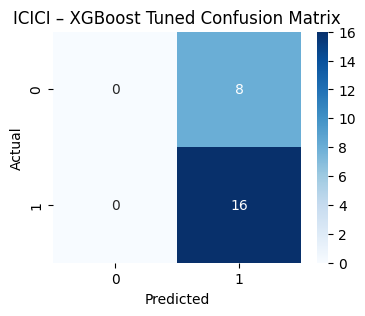

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_icici = confusion_matrix(
    icici_xgb_pred["actual_trend"],
    icici_xgb_pred["tuned_pred"]
)

plt.figure(figsize=(4,3))
sns.heatmap(cm_icici, annot=True, fmt="d", cmap="Blues")
plt.title("ICICI – XGBoost Tuned Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


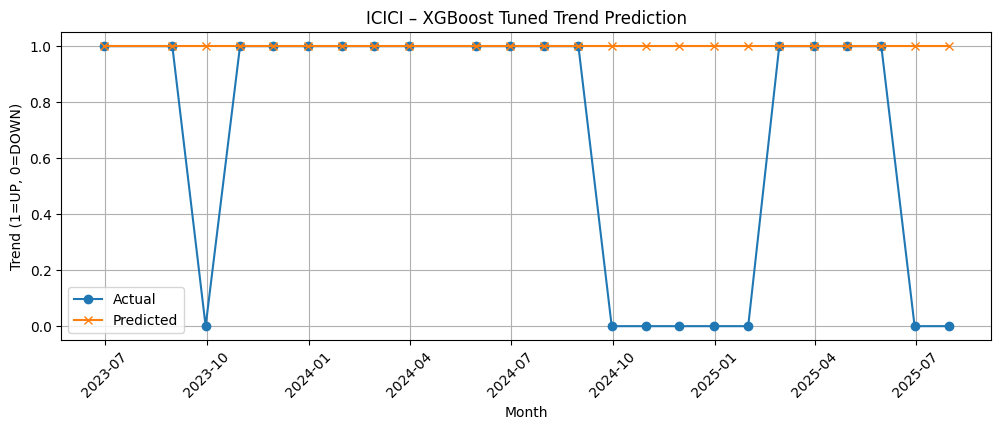

In [68]:
plt.figure(figsize=(12,4))
plt.plot(icici_xgb_pred["month_end"], icici_xgb_pred["actual_trend"], label="Actual", marker="o")
plt.plot(icici_xgb_pred["month_end"], icici_xgb_pred["tuned_pred"], label="Predicted", marker="x")
plt.title("ICICI – XGBoost Tuned Trend Prediction")
plt.xlabel("Month")
plt.ylabel("Trend (1=UP, 0=DOWN)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


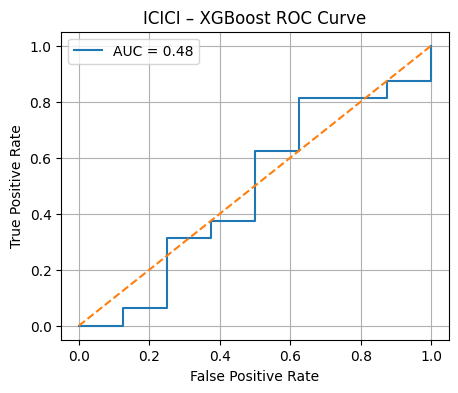

In [69]:
from sklearn.metrics import roc_curve, auc

y_true_i = icici_xgb_pred["actual_trend"]
y_prob_i = icici_xgb_pred["prob_up"]

fpr_i, tpr_i, _ = roc_curve(y_true_i, y_prob_i)
roc_auc_i = auc(fpr_i, tpr_i)

plt.figure(figsize=(5,4))
plt.plot(fpr_i, tpr_i, label=f"AUC = {roc_auc_i:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ICICI – XGBoost ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


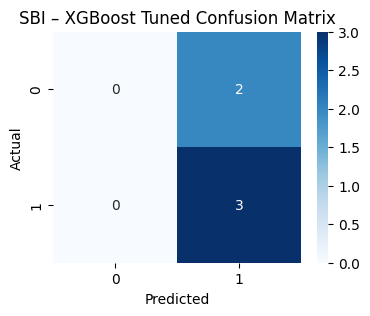

In [70]:
cm_sbi = confusion_matrix(
    sbi_xgb_pred["actual_trend"],
    sbi_xgb_pred["tuned_pred"]
)

plt.figure(figsize=(4,3))
sns.heatmap(cm_sbi, annot=True, fmt="d", cmap="Blues")
plt.title("SBI – XGBoost Tuned Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


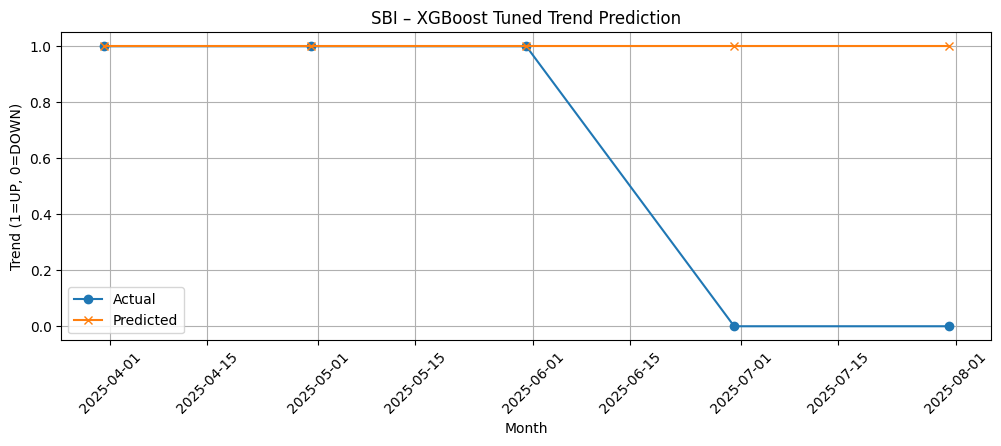

In [71]:
plt.figure(figsize=(12,4))
plt.plot(sbi_xgb_pred["month_end"], sbi_xgb_pred["actual_trend"], label="Actual", marker="o")
plt.plot(sbi_xgb_pred["month_end"], sbi_xgb_pred["tuned_pred"], label="Predicted", marker="x")
plt.title("SBI – XGBoost Tuned Trend Prediction")
plt.xlabel("Month")
plt.ylabel("Trend (1=UP, 0=DOWN)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


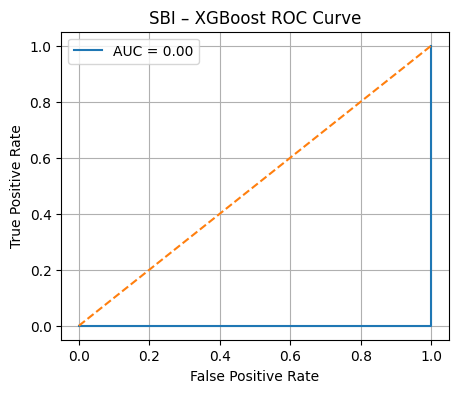

In [72]:
y_true_s = sbi_xgb_pred["actual_trend"]
y_prob_s = sbi_xgb_pred["prob_up"]

fpr_s, tpr_s, _ = roc_curve(y_true_s, y_prob_s)
roc_auc_s = auc(fpr_s, tpr_s)

plt.figure(figsize=(5,4))
plt.plot(fpr_s, tpr_s, label=f"AUC = {roc_auc_s:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SBI – XGBoost ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [73]:
import matplotlib.pyplot as plt

def plot_before_after_shift(pred_df, bank_name):
    plt.figure(figsize=(12,4))

    # BEFORE shift (default XGBoost prediction)
    plt.plot(
        pred_df["month_end"],
        pred_df["predicted_trend"],
        marker="o",
        linestyle="--",
        label="Before Shift (Threshold = 0.50)"
    )

    # AFTER shift (tuned threshold)
    plt.plot(
        pred_df["month_end"],
        pred_df["tuned_pred"],
        marker="x",
        linestyle="-",
        label="After Shift (Tuned Threshold)"
    )

    # ACTUAL
    plt.plot(
        pred_df["month_end"],
        pred_df["actual_trend"],
        marker="s",
        linestyle="-",
        label="Actual Trend"
    )

    plt.title(f"{bank_name} — XGBoost Trend Prediction Before vs After Shift")
    plt.xlabel("Month")
    plt.ylabel("Trend (1 = UP, 0 = DOWN)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


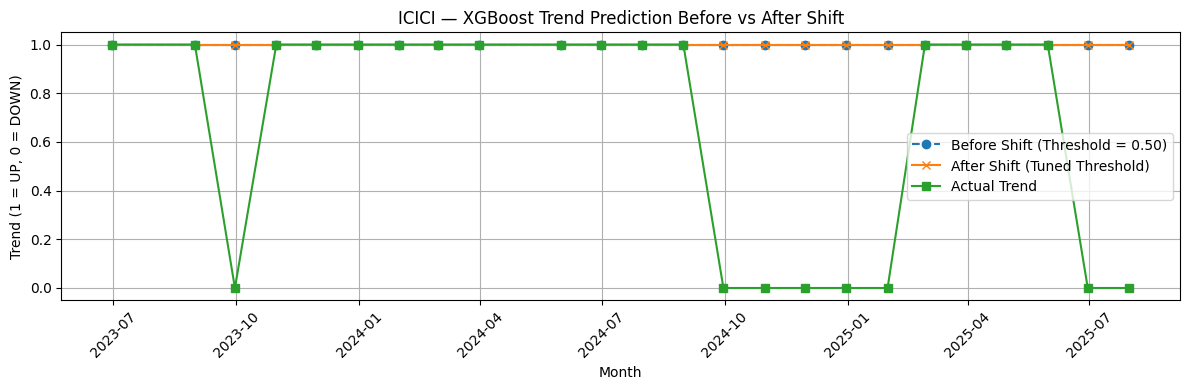

In [75]:
plot_before_after_shift(icici_xgb_pred, "ICICI")


In [76]:
def create_balanced_trend(df):
    df = df.copy()
    median_ret = df["target_next_return"].median()
    df["target_trend"] = (df["target_next_return"] > median_ret).astype(int)
    return df

hdfc_bal = create_balanced_trend(hdfc_data)
icici_bal = create_balanced_trend(icici_data)
sbi_bal   = create_balanced_trend(sbi_data)

# Check balance
print(hdfc_bal["target_trend"].value_counts())
print(icici_bal["target_trend"].value_counts())
print(sbi_bal["target_trend"].value_counts())


target_trend
0    28
1    27
Name: count, dtype: int64
target_trend
0    68
1    67
Name: count, dtype: int64
target_trend
0    15
1    14
Name: count, dtype: int64


In [77]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    balanced_accuracy_score,
)
import numpy as np
import pandas as pd  # make sure this is imported


def train_xgb_classifier(df, feature_cols, test_size=0.2):
    """
    Train an XGBoost classifier for binary trend prediction.

    - Uses time-based train/test split (no shuffling).
    - Handles class imbalance via scale_pos_weight.
    - Returns model, metrics dict, and prediction DataFrame.
    """

    # Drop rows with missing features or target
    df = df.dropna(subset=feature_cols + ["target_trend"]).copy()

    X = df[feature_cols].values
    y = df["target_trend"].values
    dates = df["month_end"].values

    # Time-based split
    split_idx = int(len(df) * (1 - test_size))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    test_dates = dates[split_idx:]

    # ----- class imbalance handling (very important) -----
    pos = (y_train == 1).sum()
    neg = (y_train == 0).sum()

    if pos == 0 or neg == 0:
        # fallback: no imbalance info, avoid division by zero
        scale_pos_weight = 1.0
    else:
        # if positives are fewer, they get higher weight
        scale_pos_weight = neg / pos

    # XGBoost classifier tuned for small dataset
    model = XGBClassifier(
        max_depth=2,          # shallow to prevent overfitting
        learning_rate=0.1,
        n_estimators=50,      # fewer trees since data is small
        subsample=0.7,        # subsample for variance reduction
        colsample_bytree=0.7,
        reg_lambda=1.0,
        reg_alpha=0.7,        # L1 regularization to reduce noise
        objective="binary:logistic",
        eval_metric="auc",
        random_state=42,
        scale_pos_weight=scale_pos_weight,  # <-- KEY CHANGE
    )

    model.fit(X_train, y_train)

    # Raw predictions at default threshold 0.5
    probs = model.predict_proba(X_test)[:, 1]
    preds = (probs > 0.5).astype(int)

    # Metrics (note: accuracy is not enough, we also use balanced_accuracy)
    metrics = {
        "accuracy": accuracy_score(y_test, preds),
        "balanced_accuracy": balanced_accuracy_score(y_test, preds),
        "precision": precision_score(y_test, preds, zero_division=0),
        "recall": recall_score(y_test, preds, zero_division=0),
        "f1": f1_score(y_test, preds, zero_division=0),
        "auc": roc_auc_score(y_test, probs),
        "scale_pos_weight": scale_pos_weight,
    }

    # Prediction DataFrame for further analysis / threshold tuning
    pred_df = pd.DataFrame({
        "month_end": test_dates,
        "actual_trend": y_test,
        "predicted_trend": preds,
        "prob_up": probs,
    })

    return model, metrics, pred_df


In [78]:
from sklearn.metrics import balanced_accuracy_score, f1_score

def optimize_threshold_balanced(pred_df, metric="balanced_accuracy"):
    """
    Tune decision threshold using balanced accuracy or F1.
    This avoids 'always predict majority class' solutions.
    """
    y_true = pred_df["actual_trend"].values
    y_prob = pred_df["prob_up"].values

    best_score = 0.0
    best_threshold = 0.5

    for t in np.linspace(0.1, 0.9, 81):
        preds = (y_prob > t).astype(int)
        if metric == "balanced_accuracy":
            score = balanced_accuracy_score(y_true, preds)
        else:
            score = f1_score(y_true, preds, zero_division=0)

        if score > best_score:
            best_score = score
            best_threshold = t

    return best_threshold, best_score


In [80]:
# 1) Start from original merged monthly HDFC dataset: hdfc_data
# (you already have this from build_bank_dataset)

# 2) Create balanced trend labels using median
hdfc_bal = create_balanced_trend(hdfc_data)

# 3) Add lag features on top of the balanced dataframe
hdfc_bal = add_lag_features(hdfc_bal)

# 4) Drop rows with missing values in features + target
hdfc_bal = hdfc_bal.dropna(subset=features_C + ["target_trend"])

# (Optional) sanity check: all features exist
print("Missing features:", set(features_C) - set(hdfc_bal.columns))

# 5) Now train XGBoost safely
xgb_hdfc, metrics_hdfc, pred_hdfc = train_xgb_classifier(hdfc_bal, features_C)

print("Metrics HDFC:", metrics_hdfc)
print("Raw preds value counts:")
print(pred_hdfc["predicted_trend"].value_counts())

# 6) Threshold tuning based on balanced accuracy
best_t, best_bal_acc = optimize_threshold_balanced(pred_hdfc, metric="balanced_accuracy")
pred_hdfc["tuned_pred"] = (pred_hdfc["prob_up"] > best_t).astype(int)

print("Best threshold:", best_t)
print("Balanced accuracy:", best_bal_acc)
print("Tuned preds value counts:")
print(pred_hdfc["tuned_pred"].value_counts())

Missing features: set()
Metrics HDFC: {'accuracy': 0.36363636363636365, 'balanced_accuracy': 0.39285714285714285, 'precision': 0.2857142857142857, 'recall': 0.5, 'f1': 0.36363636363636365, 'auc': 0.5, 'scale_pos_weight': np.float64(0.9047619047619048)}
Raw preds value counts:
predicted_trend
1    7
0    4
Name: count, dtype: int64
Best threshold: 0.35
Balanced accuracy: 0.6428571428571428
Tuned preds value counts:
tuned_pred
1    9
0    2
Name: count, dtype: int64


In [81]:
pred_hdfc["predicted_trend"].value_counts()
pred_hdfc["tuned_pred"].value_counts()


tuned_pred
1    9
0    2
Name: count, dtype: int64

In [83]:
# 1) Start from your original merged ICICI monthly dataset: icici_data

# 2) Create balanced trend label (median-based)
icici_bal = create_balanced_trend(icici_data)

# 3) Add lag features
icici_bal = add_lag_features(icici_bal)

# 4) Drop rows with missing values in features + target
icici_bal = icici_bal.dropna(subset=features_C + ["target_trend"])

print("ICICI balanced+lag shape:", icici_bal.shape)
print("Missing features:", set(features_C) - set(icici_bal.columns))
print(icici_bal["target_trend"].value_counts())


ICICI balanced+lag shape: (130, 23)
Missing features: set()
target_trend
0    66
1    64
Name: count, dtype: int64


In [84]:
xgb_icici, metrics_icici, pred_icici = train_xgb_classifier(icici_bal, features_C)

print("ICICI metrics (default threshold 0.5):")
print(metrics_icici)

print("\nICICI raw predictions (before threshold tuning):")
print(pred_icici["predicted_trend"].value_counts())


ICICI metrics (default threshold 0.5):
{'accuracy': 0.46153846153846156, 'balanced_accuracy': 0.42857142857142855, 'precision': 0.5, 'recall': 0.8571428571428571, 'f1': 0.631578947368421, 'auc': 0.4523809523809524, 'scale_pos_weight': np.float64(1.08)}

ICICI raw predictions (before threshold tuning):
predicted_trend
1    24
0     2
Name: count, dtype: int64


In [85]:
best_t_icici, best_bal_acc_icici = optimize_threshold_balanced(
    pred_icici,
    metric="balanced_accuracy"
)

pred_icici["tuned_pred"] = (pred_icici["prob_up"] > best_t_icici).astype(int)

print("Best threshold (ICICI):", best_t_icici)
print("Balanced accuracy (ICICI, tuned):", best_bal_acc_icici)

print("\nICICI tuned predictions (after threshold tuning):")
print(pred_icici["tuned_pred"].value_counts())


Best threshold (ICICI): 0.63
Balanced accuracy (ICICI, tuned): 0.5952380952380952

ICICI tuned predictions (after threshold tuning):
tuned_pred
1    20
0     6
Name: count, dtype: int64


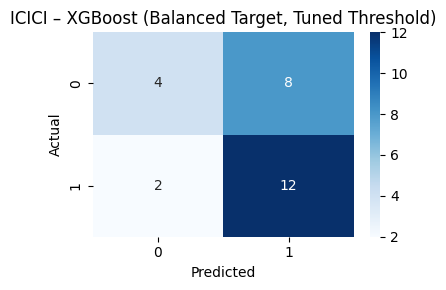

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_icici = confusion_matrix(pred_icici["actual_trend"], pred_icici["tuned_pred"])

plt.figure(figsize=(4,3))
sns.heatmap(cm_icici, annot=True, fmt="d", cmap="Blues")
plt.title("ICICI – XGBoost (Balanced Target, Tuned Threshold)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [89]:
from sklearn.metrics import confusion_matrix

cm_icici = confusion_matrix(
    pred_icici["actual_trend"],
    pred_icici["tuned_pred"]
)

cm_icici


array([[ 4,  8],
       [ 2, 12]])

In [90]:
from sklearn.metrics import recall_score

def optimize_threshold_for_down(pred_df):
    y_true = pred_df["actual_trend"].values
    y_prob = pred_df["prob_up"].values

    best_recall = 0
    best_t = 0.5

    for t in np.linspace(0.05, 0.5, 50):   # focus on LOWER thresholds
        preds = (y_prob > t).astype(int)
        recall_down = recall_score(y_true, preds, pos_label=0, zero_division=0)

        if recall_down > best_recall:
            best_recall = recall_down
            best_t = t

    return best_t, best_recall


In [91]:
down_t, down_recall = optimize_threshold_for_down(pred_icici)
pred_icici["down_optimized_pred"] = (pred_icici["prob_up"] > down_t).astype(int)

pred_icici["down_optimized_pred"].value_counts()


down_optimized_pred
1    24
0     2
Name: count, dtype: int64

In [94]:
def add_lag_features(df):
    df = df.copy()

    # --- Ensure we have nav_month_end ---
    if "nav_month_end" not in df.columns:
        raise ValueError("Expected 'nav_month_end' column in df for lag features.")

    # --- Ensure we have monthly_return; create it if missing ---
    if "monthly_return" not in df.columns:
        # Compute monthly return from nav if not already there
        df["monthly_return"] = df["nav_month_end"].pct_change()

    # 1-month lag return
    df["lag_return_1"] = df["monthly_return"].shift(1)

    # 3-month rolling mean & std of return (shifted so they use past info only)
    df["lag_return_3_mean"] = df["monthly_return"].rolling(3).mean().shift(1)
    df["lag_return_3_std"] = df["monthly_return"].rolling(3).std().shift(1)

    # NAV differences / slope
    df["nav_diff_1"] = df["nav_month_end"].diff(1)
    df["nav_slope_3"] = df["nav_month_end"].rolling(3).apply(
        lambda x: (x.iloc[-1] - x.iloc[0]) / 3 if len(x) == 3 else np.nan
    ).shift(1)

    # --- Extra reversal-sensitive features to improve DOWN detection ---

    # Speed of change (acceleration of returns)
    df["return_acceleration"] = df["monthly_return"].diff().shift(1)

    # Overextension (z-score of returns, 6-month window)
    roll_mean_6 = df["monthly_return"].rolling(6).mean()
    roll_std_6 = df["monthly_return"].rolling(6).std()
    df["zscore_return"] = ((df["monthly_return"] - roll_mean_6) / roll_std_6).shift(1)

    # Drawdown from 6-month rolling max (captures tops / reversals)
    df["rolling_max_nav_6"] = df["nav_month_end"].rolling(6).max()
    df["drawdown_6"] = (df["nav_month_end"] - df["rolling_max_nav_6"]).shift(1)

    return df


In [95]:
features_C = [
    "repo_rate", "call_money_rate", "wpi_rate", "cpi_industrial",
    "nifty500_return", "niftydiv_return",
    "lag_return_1", "lag_return_3_mean", "lag_return_3_std",
    "nav_diff_1", "nav_slope_3",
    "return_acceleration", "zscore_return", "drawdown_6"
]


In [96]:
# 1) Start from original merged ICICI dataset
# icici_data = build_bank_dataset(...)

# 2) Balanced trend target
icici_bal = create_balanced_trend(icici_data)

# 3) Add lag + reversal features
icici_bal = add_lag_features(icici_bal)

# 4) Drop missing
icici_bal = icici_bal.dropna(subset=features_C + ["target_trend"])

# 5) Train XGBoost with class-weight + metrics
xgb_icici, metrics_icici, pred_icici = train_xgb_classifier(icici_bal, features_C)
print("ICICI metrics:", metrics_icici)
print("Pred counts (default):")
print(pred_icici["predicted_trend"].value_counts())

# 6) Tune threshold for balanced accuracy or DOWN recall
best_t_icici, best_bal_acc_icici = optimize_threshold_balanced(
    pred_icici, metric="balanced_accuracy"
)
pred_icici["tuned_pred"] = (pred_icici["prob_up"] > best_t_icici).astype(int)

print("Best threshold:", best_t_icici)
print("Balanced accuracy (ICICI):", best_bal_acc_icici)
print("Pred counts (tuned):")
print(pred_icici["tuned_pred"].value_counts())


ICICI metrics: {'accuracy': 0.46153846153846156, 'balanced_accuracy': 0.44047619047619047, 'precision': 0.5, 'recall': 0.7142857142857143, 'f1': 0.5882352941176471, 'auc': 0.42261904761904756, 'scale_pos_weight': np.float64(1.1041666666666667)}
Pred counts (default):
predicted_trend
1    20
0     6
Name: count, dtype: int64
Best threshold: 0.76
Balanced accuracy (ICICI): 0.5238095238095238
Pred counts (tuned):
tuned_pred
0    21
1     5
Name: count, dtype: int64


In [97]:
import matplotlib.pyplot as plt

def plot_trend_model(pred_df, title, use_tuned=True):
    """
    Plot actual vs predicted trend over time for a given prediction DataFrame.

    pred_df must have:
      - 'month_end'
      - 'actual_trend'
      - 'predicted_trend'
      - optionally 'tuned_pred' if use_tuned=True
    """
    plt.figure(figsize=(12, 4))

    # Actual
    plt.step(
        pred_df["month_end"],
        pred_df["actual_trend"],
        where="mid",
        marker="o",
        label="Actual Trend"
    )

    # Model prediction (default or tuned)
    if use_tuned and "tuned_pred" in pred_df.columns:
        plt.step(
            pred_df["month_end"],
            pred_df["tuned_pred"],
            where="mid",
            marker="x",
            label="Predicted Trend (TUNED)"
        )
    else:
        plt.step(
            pred_df["month_end"],
            pred_df["predicted_trend"],
            where="mid",
            marker="x",
            label="Predicted Trend"
        )

    plt.title(title)
    plt.xlabel("Month")
    plt.ylabel("Trend (1 = UP, 0 = DOWN)")
    plt.xticks(rotation=45)
    plt.yticks([0, 1])
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


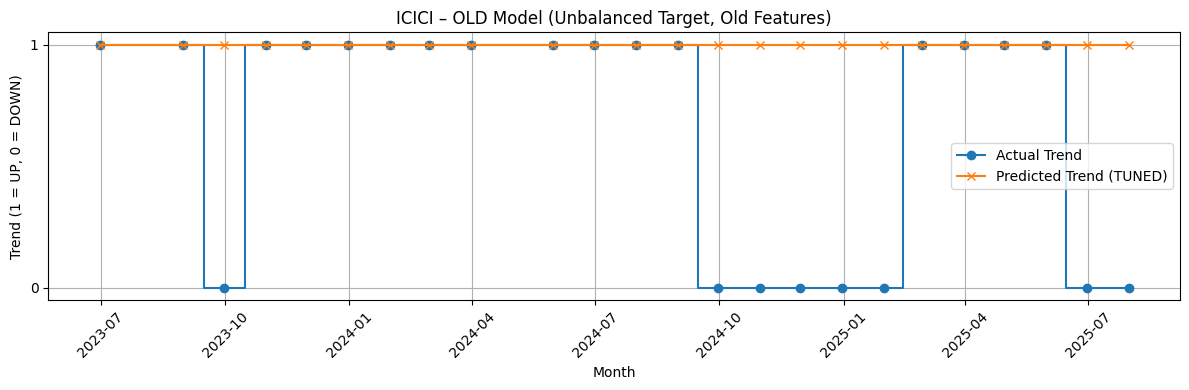

In [ ]:
icici_pred_old = icici_results["xgb"]["pred"].copy()

# If you had tuned 'tuned_pred' for the old model earlier, this will show tuned line too.
plot_trend_model(
    icici_pred_old,
    title="ICICI – OLD Model (Unbalanced Target, Old Features)",
    use_tuned=True  # or False if no tuned_pred
)

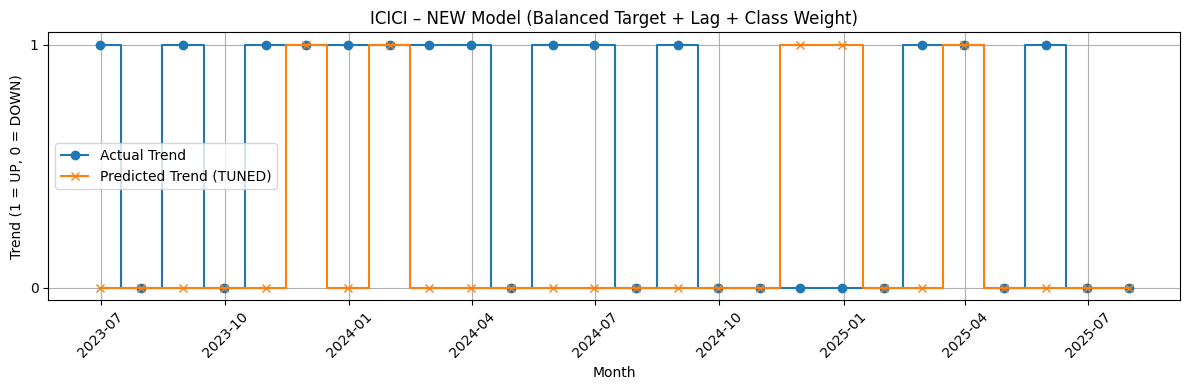

In [99]:
# pred_icici is from the new pipeline:
# icici_bal -> add_lag_features -> train_xgb_classifier -> optimize_threshold_balanced

plot_trend_model(
    pred_icici,
    title="ICICI – NEW Model (Balanced Target + Lag + Class Weight)",
    use_tuned=True
)


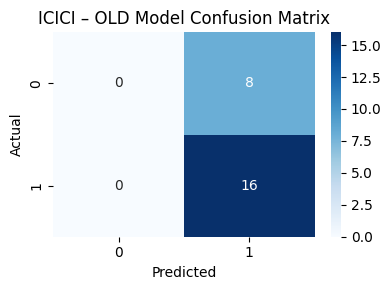

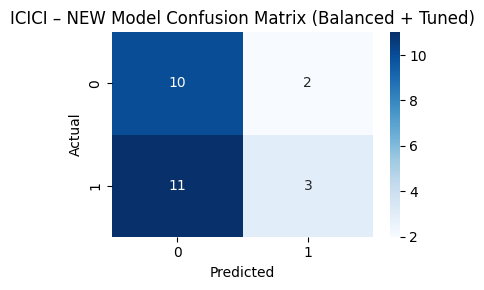

In [100]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# OLD
cm_old = confusion_matrix(icici_pred_old["actual_trend"], icici_pred_old["predicted_trend"])

plt.figure(figsize=(4,3))
sns.heatmap(cm_old, annot=True, fmt="d", cmap="Blues")
plt.title("ICICI – OLD Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# NEW (tuned)
cm_new = confusion_matrix(pred_icici["actual_trend"], pred_icici["tuned_pred"])

plt.figure(figsize=(4,3))
sns.heatmap(cm_new, annot=True, fmt="d", cmap="Blues")
plt.title("ICICI – NEW Model Confusion Matrix (Balanced + Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
